In [1]:
import IJulia

# The julia kernel has built in support for Revise.jl, so this is the 
# recommended approach for long-running sessions:
# https://github.com/JuliaLang/IJulia.jl/blob/9b10fa9b879574bbf720f5285029e07758e50a5e/src/kernel.jl#L46-L51

# Users should enable revise within .julia/config/startup_ijulia.jl:
# https://timholy.github.io/Revise.jl/stable/config/#Using-Revise-automatically-within-Jupyter/IJulia-1

# clear console history
IJulia.clear_history()

fig_width = 7
fig_height = 5
fig_format = :retina
fig_dpi = 96

# no retina format type, use svg for high quality type/marks
if fig_format == :retina
  fig_format = :svg
elseif fig_format == :pdf
  fig_dpi = 96
  # Enable PDF support for IJulia
  IJulia.register_mime(MIME("application/pdf"))
end

# convert inches to pixels
fig_width = fig_width * fig_dpi
fig_height = fig_height * fig_dpi

# Intialize Plots w/ default fig width/height
try
  import Plots

  # Plots.jl doesn't support PDF output for versions < 1.28.1
  # so use png (if the DPI remains the default of 300 then set to 96)
  if (Plots._current_plots_version < v"1.28.1") & (fig_format == :pdf)
    Plots.gr(size=(fig_width, fig_height), fmt = :png, dpi = fig_dpi)
  else
    Plots.gr(size=(fig_width, fig_height), fmt = fig_format, dpi = fig_dpi)
  end
catch e
  # @warn "Plots init" exception=(e, catch_backtrace())
end

# Initialize CairoMakie with default fig width/height
try
  import CairoMakie

  # CairoMakie's display() in PDF format opens an interactive window
  # instead of saving to the ipynb file, so we don't do that.
  # https://github.com/quarto-dev/quarto-cli/issues/7548
  if fig_format == :pdf
    CairoMakie.activate!(type = "png")
  else
    CairoMakie.activate!(type = string(fig_format))
  end
  CairoMakie.update_theme!(resolution=(fig_width, fig_height))
catch e
    # @warn "CairoMakie init" exception=(e, catch_backtrace())
end
  
# Set run_path if specified
try
  run_path = raw"/home/vituri/Documentos/GitHub/blog/posts/symbolic regression"
  if !isempty(run_path)
    cd(run_path)
  end
catch e
  @warn "Run path init:" exception=(e, catch_backtrace())
end


# emulate old Pkg.installed beahvior, see
# https://discourse.julialang.org/t/how-to-use-pkg-dependencies-instead-of-pkg-installed/36416/9
import Pkg
function isinstalled(pkg::String)
  any(x -> x.name == pkg && x.is_direct_dep, values(Pkg.dependencies()))
end

# ojs_define
if isinstalled("JSON") && isinstalled("DataFrames")
  import JSON, DataFrames
  global function ojs_define(; kwargs...)
    convert(x) = x
    convert(x::DataFrames.AbstractDataFrame) = Tables.rows(x)
    content = Dict("contents" => [Dict("name" => k, "value" => convert(v)) for (k, v) in kwargs])
    tag = "<script type='ojs-define'>$(JSON.json(content))</script>"
    IJulia.display(MIME("text/html"), tag)
  end
elseif isinstalled("JSON")
  import JSON
  global function ojs_define(; kwargs...)
    content = Dict("contents" => [Dict("name" => k, "value" => v) for (k, v) in kwargs])
    tag = "<script type='ojs-define'>$(JSON.json(content))</script>"
    IJulia.display(MIME("text/html"), tag)
  end
else
  global function ojs_define(; kwargs...)
    @warn "JSON package not available. Please install the JSON.jl package to use ojs_define."
  end
end


# don't return kernel dependencies (b/c Revise should take care of dependencies)
nothing


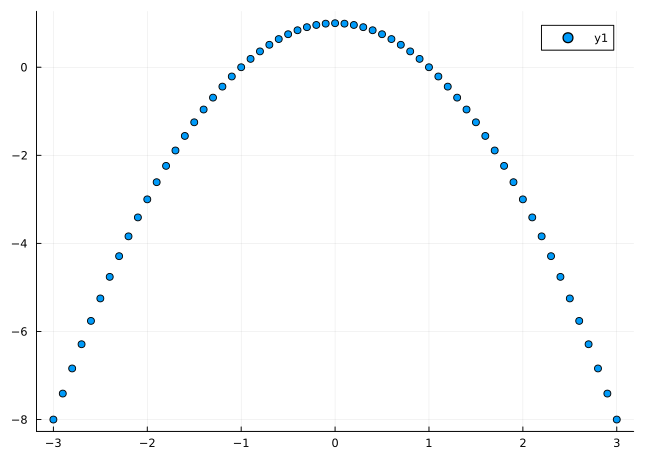

In [2]:
using SymbolicRegression, MLJ, SymbolicUtils
using Plots

x = [-3:0.1:3;]
y = @. - x^2 + 1;

scatter(x, y)

In [3]:
model = SRRegressor(
    binary_operators=[+, -, *],    
    niterations=50
);

In [4]:
#| echo: false
X = reshape(x, (length(x), 1))

mach = machine(model, X, y)
fit!(mach)

[ Info: Training machine(SRRegressor(binary_operators = Function[+, -, *], …), …).
┌ Warning: You are using multithreading mode, but only one thread is available. Try starting julia with `--threads=auto`.
└ @ SymbolicRegression ~/.julia/packages/SymbolicRegression/5HYEt/src/SymbolicRegression.jl:546


Started!


0.0%┣                                             ┫ 0/750 [00:00<-1:-35, -0s/it]Expressions evaluated per second: [.....]. Head worker occupation: 0.0%         Press 'q' and then <enter> to stop execution early.                             Hall of Fame:                                                                   ---------------------------------------------------------------------------------------------------                                                             Complexity  Loss       Score     Equation                                       1           1.315e+01  3.604e+01  y = 0.23747                                   3           8.754e+00  2.033e-01  y = (-1.0295 * 1.0339)                        5           3.971e+00  3.952e-01  y = (x₁ * (0.97904 - x₁))                     7           7.964e-03  3.106e+00  y = ((x₁ - -1.0295) * (0.97904 - x₁))         9           8.238e-21  1.802e+01  y = ((x₁ - -1) * (0.97085 - (x₁ + -0.029151)))                                        

1.2%┣▌                                             ┫ 9/750 [00:00<00:28, 27it/s]Expressions evaluated per second: [.....]. Head worker occupation: 2.5%         Press 'q' and then <enter> to stop execution early.                             Hall of Fame:                                                                   ---------------------------------------------------------------------------------------------------                                                             Complexity  Loss       Score     Equation                                       1           7.682e+00  3.604e+01  y = -2.1                                      5           0.000e+00  9.011e+00  y = (1 - (x₁ * x₁))                           ---------------------------------------------------------------------------------------------------
2.5%┣█▏                                           ┫ 19/750 [00:00<00:14, 51it/s]Expressions evaluated per second: [.....]. Head worker occupation: 3.3%         Press 'q' and then <

3.6%┣█▋                                           ┫ 27/750 [00:00<00:11, 64it/s]Expressions evaluated per second: [.....]. Head worker occupation: 3.3%         Press 'q' and then <enter> to stop execution early.                             Hall of Fame:                                                                   ---------------------------------------------------------------------------------------------------                                                             Complexity  Loss       Score     Equation                                       1           7.682e+00  3.604e+01  y = -2.1                                      5           0.000e+00  9.011e+00  y = (1 - (x₁ * x₁))                           ---------------------------------------------------------------------------------------------------
5.1%┣██▎                                          ┫ 38/750 [00:00<00:09, 78it/s]Expressions evaluated per second: [.....]. Head worker occupation: 3.4%         Press 'q' and then <

6.1%┣██▊                                          ┫ 46/750 [00:01<00:08, 84it/s]Expressions evaluated per second: [.....]. Head worker occupation: 4.4%         Press 'q' and then <enter> to stop execution early.                             Hall of Fame:                                                                   ---------------------------------------------------------------------------------------------------                                                             Complexity  Loss       Score     Equation                                       1           7.682e+00  3.604e+01  y = -2.1                                      5           0.000e+00  9.011e+00  y = (1 - (x₁ * x₁))                           ---------------------------------------------------------------------------------------------------


7.2%┣███▎                                         ┫ 54/750 [00:01<00:08, 88it/s]Expressions evaluated per second: [.....]. Head worker occupation: 4.3%         Press 'q' and then <enter> to stop execution early.                             Hall of Fame:                                                                   ---------------------------------------------------------------------------------------------------                                                             Complexity  Loss       Score     Equation                                       1           7.682e+00  3.604e+01  y = -2.1                                      5           0.000e+00  9.011e+00  y = (1 - (x₁ * x₁))                           ---------------------------------------------------------------------------------------------------
8.3%┣███▊                                         ┫ 62/750 [00:01<00:08, 91it/s]Expressions evaluated per second: [.....]. Head worker occupation: 4.1%         Press 'q' and then <

9.1%┣████                                         ┫ 68/750 [00:01<00:07, 93it/s]Expressions evaluated per second: [.....]. Head worker occupation: 4.1%         Press 'q' and then <enter> to stop execution early.                             Hall of Fame:                                                                   ---------------------------------------------------------------------------------------------------                                                             Complexity  Loss       Score     Equation                                       1           7.682e+00  3.604e+01  y = -2.1                                      5           0.000e+00  9.011e+00  y = (1 - (x₁ * x₁))                           ---------------------------------------------------------------------------------------------------


10.0%┣████▍                                       ┫ 75/750 [00:01<00:07, 94it/s]Expressions evaluated per second: [.....]. Head worker occupation: 4.0%         Press 'q' and then <enter> to stop execution early.                             Hall of Fame:                                                                   ---------------------------------------------------------------------------------------------------                                                             Complexity  Loss       Score     Equation                                       1           7.682e+00  3.604e+01  y = -2.1                                      5           0.000e+00  9.011e+00  y = (1 - (x₁ * x₁))                           ---------------------------------------------------------------------------------------------------
11.1%┣████▉                                       ┫ 83/750 [00:01<00:07, 96it/s]Expressions evaluated per second: [.....]. Head worker occupation: 4.0%         Press 'q' and then <

12.1%┣█████▍                                      ┫ 91/750 [00:01<00:07, 97it/s]Expressions evaluated per second: [.....]. Head worker occupation: 3.9%         Press 'q' and then <enter> to stop execution early.                             Hall of Fame:                                                                   ---------------------------------------------------------------------------------------------------                                                             Complexity  Loss       Score     Equation                                       1           7.682e+00  3.604e+01  y = -2.1                                      5           0.000e+00  9.011e+00  y = (1 - (x₁ * x₁))                           ---------------------------------------------------------------------------------------------------
13.3%┣█████▋                                    ┫ 100/750 [00:01<00:06, 101it/s]Expressions evaluated per second: [.....]. Head worker occupation: 3.9%         Press 'q' and then <

14.3%┣██████                                    ┫ 107/750 [00:01<00:06, 101it/s]Expressions evaluated per second: 1.38e+05. Head worker occupation: 3.9%        Press 'q' and then <enter> to stop execution early.                             Hall of Fame:                                                                   ---------------------------------------------------------------------------------------------------                                                             Complexity  Loss       Score     Equation                                       1           7.682e+00  3.604e+01  y = -2.1                                      5           0.000e+00  9.011e+00  y = (1 - (x₁ * x₁))                           ---------------------------------------------------------------------------------------------------


15.1%┣██████▎                                   ┫ 113/750 [00:01<00:06, 102it/s]Expressions evaluated per second: 1.38e+05. Head worker occupation: 3.9%        Press 'q' and then <enter> to stop execution early.                             Hall of Fame:                                                                   ---------------------------------------------------------------------------------------------------                                                             Complexity  Loss       Score     Equation                                       1           7.682e+00  3.604e+01  y = -2.1                                      5           0.000e+00  9.011e+00  y = (1 - (x₁ * x₁))                           ---------------------------------------------------------------------------------------------------
15.9%┣██████▋                                   ┫ 119/750 [00:01<00:06, 102it/s]Expressions evaluated per second: 1.38e+05. Head worker occupation: 3.8%        Press 'q' and then <

16.9%┣███████▏                                  ┫ 127/750 [00:01<00:06, 102it/s]Expressions evaluated per second: 1.38e+05. Head worker occupation: 3.8%        Press 'q' and then <enter> to stop execution early.                             Hall of Fame:                                                                   ---------------------------------------------------------------------------------------------------                                                             Complexity  Loss       Score     Equation                                       1           7.682e+00  3.604e+01  y = -2.1                                      5           0.000e+00  9.011e+00  y = (1 - (x₁ * x₁))                           ---------------------------------------------------------------------------------------------------
17.7%┣███████▌                                  ┫ 133/750 [00:01<00:06, 102it/s]Expressions evaluated per second: 1.38e+05. Head worker occupation: 4.2%        Press 'q' and then <

18.5%┣███████▉                                  ┫ 139/750 [00:01<00:06, 102it/s]Expressions evaluated per second: 1.38e+05. Head worker occupation: 4.1%        Press 'q' and then <enter> to stop execution early.                             Hall of Fame:                                                                   ---------------------------------------------------------------------------------------------------                                                             Complexity  Loss       Score     Equation                                       1           7.682e+00  3.604e+01  y = -2.1                                      5           0.000e+00  9.011e+00  y = (1 - (x₁ * x₁))                           ---------------------------------------------------------------------------------------------------


19.5%┣████████▏                                 ┫ 146/750 [00:01<00:06, 103it/s]Expressions evaluated per second: 1.38e+05. Head worker occupation: 4.1%        Press 'q' and then <enter> to stop execution early.                             Hall of Fame:                                                                   ---------------------------------------------------------------------------------------------------                                                             Complexity  Loss       Score     Equation                                       1           7.682e+00  3.604e+01  y = -2.1                                      5           0.000e+00  9.011e+00  y = (1 - (x₁ * x₁))                           ---------------------------------------------------------------------------------------------------
20.3%┣████████▌                                 ┫ 152/750 [00:01<00:06, 102it/s]Expressions evaluated per second: 1.38e+05. Head worker occupation: 4.0%        Press 'q' and then <

21.1%┣████████▉                                 ┫ 158/750 [00:02<00:06, 102it/s]Expressions evaluated per second: 1.38e+05. Head worker occupation: 4.0%        Press 'q' and then <enter> to stop execution early.                             Hall of Fame:                                                                   ---------------------------------------------------------------------------------------------------                                                             Complexity  Loss       Score     Equation                                       1           7.682e+00  3.604e+01  y = -2.1                                      5           0.000e+00  9.011e+00  y = (1 - (x₁ * x₁))                           ---------------------------------------------------------------------------------------------------
21.9%┣█████████▏                                ┫ 164/750 [00:02<00:06, 101it/s]Expressions evaluated per second: 1.38e+05. Head worker occupation: 3.9%        Press 'q' and then <

22.8%┣█████████▋                                ┫ 171/750 [00:02<00:06, 102it/s]Expressions evaluated per second: 1.38e+05. Head worker occupation: 3.9%        Press 'q' and then <enter> to stop execution early.                             Hall of Fame:                                                                   ---------------------------------------------------------------------------------------------------                                                             Complexity  Loss       Score     Equation                                       1           7.682e+00  3.604e+01  y = -2.1                                      5           0.000e+00  9.011e+00  y = (1 - (x₁ * x₁))                           ---------------------------------------------------------------------------------------------------


23.6%┣██████████                                ┫ 177/750 [00:02<00:06, 102it/s]Expressions evaluated per second: 1.38e+05. Head worker occupation: 3.9%        Press 'q' and then <enter> to stop execution early.                             Hall of Fame:                                                                   ---------------------------------------------------------------------------------------------------                                                             Complexity  Loss       Score     Equation                                       1           7.682e+00  3.604e+01  y = -2.1                                      5           0.000e+00  9.011e+00  y = (1 - (x₁ * x₁))                           ---------------------------------------------------------------------------------------------------
24.5%┣██████████▎                               ┫ 184/750 [00:02<00:06, 102it/s]Expressions evaluated per second: 1.38e+05. Head worker occupation: 3.9%        Press 'q' and then <

25.3%┣██████████▋                               ┫ 190/750 [00:02<00:05, 102it/s]Expressions evaluated per second: 1.38e+05. Head worker occupation: 3.9%        Press 'q' and then <enter> to stop execution early.                             Hall of Fame:                                                                   ---------------------------------------------------------------------------------------------------                                                             Complexity  Loss       Score     Equation                                       1           7.682e+00  3.604e+01  y = -2.1                                      5           0.000e+00  9.011e+00  y = (1 - (x₁ * x₁))                           ---------------------------------------------------------------------------------------------------
26.3%┣███████████                               ┫ 197/750 [00:02<00:05, 102it/s]Expressions evaluated per second: 1.38e+05. Head worker occupation: 3.8%        Press 'q' and then <

27.1%┣███████████▍                              ┫ 203/750 [00:02<00:05, 101it/s]Expressions evaluated per second: 1.38e+05. Head worker occupation: 3.8%        Press 'q' and then <enter> to stop execution early.                             Hall of Fame:                                                                   ---------------------------------------------------------------------------------------------------                                                             Complexity  Loss       Score     Equation                                       1           7.682e+00  3.604e+01  y = -2.1                                      5           0.000e+00  9.011e+00  y = (1 - (x₁ * x₁))                           ---------------------------------------------------------------------------------------------------


28.0%┣███████████▊                              ┫ 210/750 [00:02<00:05, 102it/s]Expressions evaluated per second: 1.28e+05. Head worker occupation: 3.8%        Press 'q' and then <enter> to stop execution early.                             Hall of Fame:                                                                   ---------------------------------------------------------------------------------------------------                                                             Complexity  Loss       Score     Equation                                       1           7.682e+00  3.604e+01  y = -2.1                                      5           0.000e+00  9.011e+00  y = (1 - (x₁ * x₁))                           ---------------------------------------------------------------------------------------------------
28.8%┣████████████                              ┫ 216/750 [00:02<00:05, 102it/s]Expressions evaluated per second: 1.28e+05. Head worker occupation: 3.8%        Press 'q' and then <

29.7%┣████████████▌                             ┫ 223/750 [00:02<00:05, 102it/s]Expressions evaluated per second: 1.28e+05. Head worker occupation: 3.7%        Press 'q' and then <enter> to stop execution early.                             Hall of Fame:                                                                   ---------------------------------------------------------------------------------------------------                                                             Complexity  Loss       Score     Equation                                       1           7.682e+00  3.604e+01  y = -2.1                                      5           0.000e+00  9.011e+00  y = (1 - (x₁ * x₁))                           ---------------------------------------------------------------------------------------------------
30.7%┣████████████▉                             ┫ 230/750 [00:02<00:05, 102it/s]Expressions evaluated per second: 1.28e+05. Head worker occupation: 3.7%        Press 'q' and then <

31.5%┣█████████████▏                            ┫ 236/750 [00:02<00:05, 101it/s]Expressions evaluated per second: 1.28e+05. Head worker occupation: 3.7%        Press 'q' and then <enter> to stop execution early.                             Hall of Fame:                                                                   ---------------------------------------------------------------------------------------------------                                                             Complexity  Loss       Score     Equation                                       1           7.682e+00  3.604e+01  y = -2.1                                      5           0.000e+00  9.011e+00  y = (1 - (x₁ * x₁))                           ---------------------------------------------------------------------------------------------------


32.3%┣█████████████▌                            ┫ 242/750 [00:02<00:05, 101it/s]Expressions evaluated per second: 1.28e+05. Head worker occupation: 3.7%        Press 'q' and then <enter> to stop execution early.                             Hall of Fame:                                                                   ---------------------------------------------------------------------------------------------------                                                             Complexity  Loss       Score     Equation                                       1           7.682e+00  3.604e+01  y = -2.1                                      5           0.000e+00  9.011e+00  y = (1 - (x₁ * x₁))                           ---------------------------------------------------------------------------------------------------
33.1%┣█████████████▉                            ┫ 248/750 [00:02<00:05, 101it/s]Expressions evaluated per second: 1.28e+05. Head worker occupation: 3.7%        Press 'q' and then <

33.9%┣██████████████▎                           ┫ 254/750 [00:03<00:05, 101it/s]Expressions evaluated per second: 1.28e+05. Head worker occupation: 3.6%        Press 'q' and then <enter> to stop execution early.                             Hall of Fame:                                                                   ---------------------------------------------------------------------------------------------------                                                             Complexity  Loss       Score     Equation                                       1           7.682e+00  3.604e+01  y = -2.1                                      5           0.000e+00  9.011e+00  y = (1 - (x₁ * x₁))                           ---------------------------------------------------------------------------------------------------
34.7%┣██████████████▋                           ┫ 260/750 [00:03<00:05, 101it/s]Expressions evaluated per second: 1.28e+05. Head worker occupation: 3.6%        Press 'q' and then <

35.3%┣██████████████▉                           ┫ 265/750 [00:03<00:05, 100it/s]Expressions evaluated per second: 1.28e+05. Head worker occupation: 3.6%        Press 'q' and then <enter> to stop execution early.                             Hall of Fame:                                                                   ---------------------------------------------------------------------------------------------------                                                             Complexity  Loss       Score     Equation                                       1           7.682e+00  3.604e+01  y = -2.1                                      5           0.000e+00  9.011e+00  y = (1 - (x₁ * x₁))                           ---------------------------------------------------------------------------------------------------


36.3%┣███████████████▎                          ┫ 272/750 [00:03<00:05, 100it/s]Expressions evaluated per second: 1.28e+05. Head worker occupation: 3.6%        Press 'q' and then <enter> to stop execution early.                             Hall of Fame:                                                                   ---------------------------------------------------------------------------------------------------                                                             Complexity  Loss       Score     Equation                                       1           7.682e+00  3.604e+01  y = -2.1                                      5           0.000e+00  9.011e+00  y = (1 - (x₁ * x₁))                           ---------------------------------------------------------------------------------------------------
37.1%┣███████████████▋                          ┫ 278/750 [00:03<00:05, 100it/s]Expressions evaluated per second: 1.28e+05. Head worker occupation: 3.5%        Press 'q' and then <

38.0%┣████████████████                          ┫ 285/750 [00:03<00:05, 100it/s]Expressions evaluated per second: 1.28e+05. Head worker occupation: 3.5%        Press 'q' and then <enter> to stop execution early.                             Hall of Fame:                                                                   ---------------------------------------------------------------------------------------------------                                                             Complexity  Loss       Score     Equation                                       1           7.682e+00  3.604e+01  y = -2.1                                      5           0.000e+00  9.011e+00  y = (1 - (x₁ * x₁))                           ---------------------------------------------------------------------------------------------------


38.7%┣████████████████▋                          ┫ 290/750 [00:03<00:05, 99it/s]Expressions evaluated per second: 1.28e+05. Head worker occupation: 3.5%        Press 'q' and then <enter> to stop execution early.                             Hall of Fame:                                                                   ---------------------------------------------------------------------------------------------------                                                             Complexity  Loss       Score     Equation                                       1           7.682e+00  3.604e+01  y = -2.1                                      5           0.000e+00  9.011e+00  y = (1 - (x₁ * x₁))                           ---------------------------------------------------------------------------------------------------
39.6%┣█████████████████                          ┫ 297/750 [00:03<00:05, 98it/s]Expressions evaluated per second: 1.16e+05. Head worker occupation: 3.5%        Press 'q' and then <

40.4%┣█████████████████▍                         ┫ 303/750 [00:03<00:05, 99it/s]Expressions evaluated per second: 1.16e+05. Head worker occupation: 3.5%        Press 'q' and then <enter> to stop execution early.                             Hall of Fame:                                                                   ---------------------------------------------------------------------------------------------------                                                             Complexity  Loss       Score     Equation                                       1           7.682e+00  3.604e+01  y = -2.1                                      5           0.000e+00  9.011e+00  y = (1 - (x₁ * x₁))                           ---------------------------------------------------------------------------------------------------


41.5%┣█████████████████▉                         ┫ 311/750 [00:03<00:04, 99it/s]Expressions evaluated per second: 1.16e+05. Head worker occupation: 3.5%        Press 'q' and then <enter> to stop execution early.                             Hall of Fame:                                                                   ---------------------------------------------------------------------------------------------------                                                             Complexity  Loss       Score     Equation                                       1           7.682e+00  3.604e+01  y = -2.1                                      5           0.000e+00  9.011e+00  y = (1 - (x₁ * x₁))                           ---------------------------------------------------------------------------------------------------
42.1%┣██████████████████▏                        ┫ 316/750 [00:03<00:04, 99it/s]Expressions evaluated per second: 1.16e+05. Head worker occupation: 3.5%        Press 'q' and then <

43.1%┣██████████████████▌                        ┫ 323/750 [00:03<00:04, 99it/s]Expressions evaluated per second: 1.16e+05. Head worker occupation: 3.7%        Press 'q' and then <enter> to stop execution early.                             Hall of Fame:                                                                   ---------------------------------------------------------------------------------------------------                                                             Complexity  Loss       Score     Equation                                       1           7.682e+00  3.604e+01  y = -2.1                                      5           0.000e+00  9.011e+00  y = (1 - (x₁ * x₁))                           ---------------------------------------------------------------------------------------------------
43.9%┣██████████████████▉                        ┫ 329/750 [00:03<00:04, 99it/s]Expressions evaluated per second: 1.16e+05. Head worker occupation: 3.7%        Press 'q' and then <

44.7%┣███████████████████▏                       ┫ 335/750 [00:03<00:04, 99it/s]Expressions evaluated per second: 1.16e+05. Head worker occupation: 3.6%        Press 'q' and then <enter> to stop execution early.                             Hall of Fame:                                                                   ---------------------------------------------------------------------------------------------------                                                             Complexity  Loss       Score     Equation                                       1           7.682e+00  3.604e+01  y = -2.1                                      5           0.000e+00  9.011e+00  y = (1 - (x₁ * x₁))                           ---------------------------------------------------------------------------------------------------
45.7%┣███████████████████▋                       ┫ 343/750 [00:03<00:04, 99it/s]Expressions evaluated per second: 1.16e+05. Head worker occupation: 3.6%        Press 'q' and then <

46.5%┣████████████████████                       ┫ 349/750 [00:04<00:04, 99it/s]Expressions evaluated per second: 1.16e+05. Head worker occupation: 3.6%        Press 'q' and then <enter> to stop execution early.                             Hall of Fame:                                                                   ---------------------------------------------------------------------------------------------------                                                             Complexity  Loss       Score     Equation                                       1           7.682e+00  3.604e+01  y = -2.1                                      5           0.000e+00  9.011e+00  y = (1 - (x₁ * x₁))                           ---------------------------------------------------------------------------------------------------


47.3%┣████████████████████▍                      ┫ 355/750 [00:04<00:04, 99it/s]Expressions evaluated per second: 1.16e+05. Head worker occupation: 3.6%        Press 'q' and then <enter> to stop execution early.                             Hall of Fame:                                                                   ---------------------------------------------------------------------------------------------------                                                             Complexity  Loss       Score     Equation                                       1           7.682e+00  3.604e+01  y = -2.1                                      5           0.000e+00  9.011e+00  y = (1 - (x₁ * x₁))                           ---------------------------------------------------------------------------------------------------
48.1%┣████████████████████▊                      ┫ 361/750 [00:04<00:04, 99it/s]Expressions evaluated per second: 1.16e+05. Head worker occupation: 3.6%        Press 'q' and then <

48.9%┣█████████████████████                      ┫ 367/750 [00:04<00:04, 98it/s]Expressions evaluated per second: 1.16e+05. Head worker occupation: 3.6%        Press 'q' and then <enter> to stop execution early.                             Hall of Fame:                                                                   ---------------------------------------------------------------------------------------------------                                                             Complexity  Loss       Score     Equation                                       1           7.682e+00  3.604e+01  y = -2.1                                      5           0.000e+00  9.011e+00  y = (1 - (x₁ * x₁))                           ---------------------------------------------------------------------------------------------------


49.7%┣█████████████████████▍                     ┫ 373/750 [00:04<00:04, 98it/s]Expressions evaluated per second: 1.16e+05. Head worker occupation: 3.6%        Press 'q' and then <enter> to stop execution early.                             Hall of Fame:                                                                   ---------------------------------------------------------------------------------------------------                                                             Complexity  Loss       Score     Equation                                       1           7.682e+00  3.604e+01  y = -2.1                                      5           0.000e+00  9.011e+00  y = (1 - (x₁ * x₁))                           ---------------------------------------------------------------------------------------------------
50.5%┣█████████████████████▊                     ┫ 379/750 [00:04<00:04, 98it/s]Expressions evaluated per second: 1.16e+05. Head worker occupation: 3.5%        Press 'q' and then <

51.6%┣██████████████████████▏                    ┫ 387/750 [00:04<00:04, 99it/s]Expressions evaluated per second: 1.16e+05. Head worker occupation: 3.5%        Press 'q' and then <enter> to stop execution early.                             Hall of Fame:                                                                   ---------------------------------------------------------------------------------------------------                                                             Complexity  Loss       Score     Equation                                       1           7.682e+00  3.604e+01  y = -2.1                                      5           0.000e+00  9.011e+00  y = (1 - (x₁ * x₁))                           ---------------------------------------------------------------------------------------------------


52.5%┣██████████████████████▋                    ┫ 394/750 [00:04<00:04, 99it/s]Expressions evaluated per second: 1.16e+05. Head worker occupation: 3.5%        Press 'q' and then <enter> to stop execution early.                             Hall of Fame:                                                                   ---------------------------------------------------------------------------------------------------                                                             Complexity  Loss       Score     Equation                                       1           7.682e+00  3.604e+01  y = -2.1                                      5           0.000e+00  9.011e+00  y = (1 - (x₁ * x₁))                           ---------------------------------------------------------------------------------------------------
53.3%┣███████████████████████                    ┫ 400/750 [00:04<00:04, 99it/s]Expressions evaluated per second: 1.14e+05. Head worker occupation: 3.5%        Press 'q' and then <

54.0%┣███████████████████████▏                   ┫ 405/750 [00:04<00:04, 98it/s]Expressions evaluated per second: 1.14e+05. Head worker occupation: 3.5%        Press 'q' and then <enter> to stop execution early.                             Hall of Fame:                                                                   ---------------------------------------------------------------------------------------------------                                                             Complexity  Loss       Score     Equation                                       1           7.682e+00  3.604e+01  y = -2.1                                      5           0.000e+00  9.011e+00  y = (1 - (x₁ * x₁))                           ---------------------------------------------------------------------------------------------------


54.9%┣███████████████████████▋                   ┫ 412/750 [00:04<00:03, 99it/s]Expressions evaluated per second: 1.14e+05. Head worker occupation: 3.5%        Press 'q' and then <enter> to stop execution early.                             Hall of Fame:                                                                   ---------------------------------------------------------------------------------------------------                                                             Complexity  Loss       Score     Equation                                       1           7.682e+00  3.604e+01  y = -2.1                                      5           0.000e+00  9.011e+00  y = (1 - (x₁ * x₁))                           ---------------------------------------------------------------------------------------------------
55.7%┣████████████████████████                   ┫ 418/750 [00:04<00:03, 99it/s]Expressions evaluated per second: 1.14e+05. Head worker occupation: 3.5%        Press 'q' and then <

56.5%┣████████████████████████▎                  ┫ 424/750 [00:04<00:03, 98it/s]Expressions evaluated per second: 1.14e+05. Head worker occupation: 3.5%        Press 'q' and then <enter> to stop execution early.                             Hall of Fame:                                                                   ---------------------------------------------------------------------------------------------------                                                             Complexity  Loss       Score     Equation                                       1           7.682e+00  3.604e+01  y = -2.1                                      5           0.000e+00  9.011e+00  y = (1 - (x₁ * x₁))                           ---------------------------------------------------------------------------------------------------
57.6%┣████████████████████████▊                  ┫ 432/750 [00:04<00:03, 98it/s]Expressions evaluated per second: 1.14e+05. Head worker occupation: 3.5%        Press 'q' and then <

58.4%┣█████████████████████████▏                 ┫ 438/750 [00:04<00:03, 98it/s]Expressions evaluated per second: 1.14e+05. Head worker occupation: 3.5%        Press 'q' and then <enter> to stop execution early.                             Hall of Fame:                                                                   ---------------------------------------------------------------------------------------------------                                                             Complexity  Loss       Score     Equation                                       1           7.682e+00  3.604e+01  y = -2.1                                      5           0.000e+00  9.011e+00  y = (1 - (x₁ * x₁))                           ---------------------------------------------------------------------------------------------------


59.2%┣█████████████████████████▌                 ┫ 444/750 [00:05<00:03, 98it/s]Expressions evaluated per second: 1.14e+05. Head worker occupation: 3.5%        Press 'q' and then <enter> to stop execution early.                             Hall of Fame:                                                                   ---------------------------------------------------------------------------------------------------                                                             Complexity  Loss       Score     Equation                                       1           7.682e+00  3.604e+01  y = -2.1                                      5           0.000e+00  9.011e+00  y = (1 - (x₁ * x₁))                           ---------------------------------------------------------------------------------------------------
60.0%┣█████████████████████████▉                 ┫ 450/750 [00:05<00:03, 98it/s]Expressions evaluated per second: 1.14e+05. Head worker occupation: 3.5%        Press 'q' and then <

60.8%┣██████████████████████████▏                ┫ 456/750 [00:05<00:03, 98it/s]Expressions evaluated per second: 1.14e+05. Head worker occupation: 3.5%        Press 'q' and then <enter> to stop execution early.                             Hall of Fame:                                                                   ---------------------------------------------------------------------------------------------------                                                             Complexity  Loss       Score     Equation                                       1           7.682e+00  3.604e+01  y = -2.1                                      5           0.000e+00  9.011e+00  y = (1 - (x₁ * x₁))                           ---------------------------------------------------------------------------------------------------
61.6%┣██████████████████████████▌                ┫ 462/750 [00:05<00:03, 98it/s]Expressions evaluated per second: 1.14e+05. Head worker occupation: 3.5%        Press 'q' and then <

62.4%┣██████████████████████████▉                ┫ 468/750 [00:05<00:03, 98it/s]Expressions evaluated per second: 1.14e+05. Head worker occupation: 3.5%        Press 'q' and then <enter> to stop execution early.                             Hall of Fame:                                                                   ---------------------------------------------------------------------------------------------------                                                             Complexity  Loss       Score     Equation                                       1           7.682e+00  3.604e+01  y = -2.1                                      5           0.000e+00  9.011e+00  y = (1 - (x₁ * x₁))                           ---------------------------------------------------------------------------------------------------


63.2%┣███████████████████████████▏               ┫ 474/750 [00:05<00:03, 98it/s]Expressions evaluated per second: 1.14e+05. Head worker occupation: 3.5%        Press 'q' and then <enter> to stop execution early.                             Hall of Fame:                                                                   ---------------------------------------------------------------------------------------------------                                                             Complexity  Loss       Score     Equation                                       1           7.682e+00  3.604e+01  y = -2.1                                      5           0.000e+00  9.011e+00  y = (1 - (x₁ * x₁))                           ---------------------------------------------------------------------------------------------------
64.0%┣███████████████████████████▌               ┫ 480/750 [00:05<00:03, 98it/s]Expressions evaluated per second: 1.14e+05. Head worker occupation: 3.5%        Press 'q' and then <

64.9%┣████████████████████████████               ┫ 487/750 [00:05<00:03, 98it/s]Expressions evaluated per second: 1.14e+05. Head worker occupation: 3.5%        Press 'q' and then <enter> to stop execution early.                             Hall of Fame:                                                                   ---------------------------------------------------------------------------------------------------                                                             Complexity  Loss       Score     Equation                                       1           7.682e+00  3.604e+01  y = -2.1                                      5           0.000e+00  9.011e+00  y = (1 - (x₁ * x₁))                           ---------------------------------------------------------------------------------------------------
65.7%┣████████████████████████████▎              ┫ 493/750 [00:05<00:03, 98it/s]Expressions evaluated per second: 1.12e+05. Head worker occupation: 3.5%        Press 'q' and then <

66.5%┣████████████████████████████▋              ┫ 499/750 [00:05<00:03, 98it/s]Expressions evaluated per second: 1.12e+05. Head worker occupation: 3.4%        Press 'q' and then <enter> to stop execution early.                             Hall of Fame:                                                                   ---------------------------------------------------------------------------------------------------                                                             Complexity  Loss       Score     Equation                                       1           7.682e+00  3.604e+01  y = -2.1                                      5           0.000e+00  9.011e+00  y = (1 - (x₁ * x₁))                           ---------------------------------------------------------------------------------------------------


67.3%┣█████████████████████████████              ┫ 505/750 [00:05<00:02, 98it/s]Expressions evaluated per second: 1.12e+05. Head worker occupation: 3.4%        Press 'q' and then <enter> to stop execution early.                             Hall of Fame:                                                                   ---------------------------------------------------------------------------------------------------                                                             Complexity  Loss       Score     Equation                                       1           7.682e+00  3.604e+01  y = -2.1                                      5           0.000e+00  9.011e+00  y = (1 - (x₁ * x₁))                           ---------------------------------------------------------------------------------------------------
68.3%┣█████████████████████████████▍             ┫ 512/750 [00:05<00:02, 98it/s]Expressions evaluated per second: 1.12e+05. Head worker occupation: 3.4%        Press 'q' and then <

68.9%┣█████████████████████████████▋             ┫ 517/750 [00:05<00:02, 98it/s]Expressions evaluated per second: 1.12e+05. Head worker occupation: 3.4%        Press 'q' and then <enter> to stop execution early.                             Hall of Fame:                                                                   ---------------------------------------------------------------------------------------------------                                                             Complexity  Loss       Score     Equation                                       1           7.682e+00  3.604e+01  y = -2.1                                      5           0.000e+00  9.011e+00  y = (1 - (x₁ * x₁))                           ---------------------------------------------------------------------------------------------------
69.9%┣██████████████████████████████             ┫ 524/750 [00:05<00:02, 98it/s]Expressions evaluated per second: 1.12e+05. Head worker occupation: 3.4%        Press 'q' and then <

70.7%┣██████████████████████████████▍            ┫ 530/750 [00:05<00:02, 98it/s]Expressions evaluated per second: 1.12e+05. Head worker occupation: 3.4%        Press 'q' and then <enter> to stop execution early.                             Hall of Fame:                                                                   ---------------------------------------------------------------------------------------------------                                                             Complexity  Loss       Score     Equation                                       1           7.682e+00  3.604e+01  y = -2.1                                      5           0.000e+00  9.011e+00  y = (1 - (x₁ * x₁))                           ---------------------------------------------------------------------------------------------------


71.5%┣██████████████████████████████▊            ┫ 536/750 [00:05<00:02, 98it/s]Expressions evaluated per second: 1.12e+05. Head worker occupation: 3.4%        Press 'q' and then <enter> to stop execution early.                             Hall of Fame:                                                                   ---------------------------------------------------------------------------------------------------                                                             Complexity  Loss       Score     Equation                                       1           7.682e+00  3.604e+01  y = -2.1                                      5           0.000e+00  9.011e+00  y = (1 - (x₁ * x₁))                           ---------------------------------------------------------------------------------------------------
72.3%┣███████████████████████████████            ┫ 542/750 [00:06<00:02, 98it/s]Expressions evaluated per second: 1.12e+05. Head worker occupation: 3.4%        Press 'q' and then <

73.1%┣███████████████████████████████▍           ┫ 548/750 [00:06<00:02, 98it/s]Expressions evaluated per second: 1.12e+05. Head worker occupation: 3.4%        Press 'q' and then <enter> to stop execution early.                             Hall of Fame:                                                                   ---------------------------------------------------------------------------------------------------                                                             Complexity  Loss       Score     Equation                                       1           7.682e+00  3.604e+01  y = -2.1                                      5           0.000e+00  9.011e+00  y = (1 - (x₁ * x₁))                           ---------------------------------------------------------------------------------------------------
74.0%┣███████████████████████████████▉           ┫ 555/750 [00:06<00:02, 98it/s]Expressions evaluated per second: 1.12e+05. Head worker occupation: 3.4%        Press 'q' and then <

74.8%┣████████████████████████████████▏          ┫ 561/750 [00:06<00:02, 98it/s]Expressions evaluated per second: 1.12e+05. Head worker occupation: 3.4%        Press 'q' and then <enter> to stop execution early.                             Hall of Fame:                                                                   ---------------------------------------------------------------------------------------------------                                                             Complexity  Loss       Score     Equation                                       1           7.682e+00  3.604e+01  y = -2.1                                      5           0.000e+00  9.011e+00  y = (1 - (x₁ * x₁))                           ---------------------------------------------------------------------------------------------------


75.7%┣████████████████████████████████▋          ┫ 568/750 [00:06<00:02, 98it/s]Expressions evaluated per second: 1.12e+05. Head worker occupation: 3.4%        Press 'q' and then <enter> to stop execution early.                             Hall of Fame:                                                                   ---------------------------------------------------------------------------------------------------                                                             Complexity  Loss       Score     Equation                                       1           7.682e+00  3.604e+01  y = -2.1                                      5           0.000e+00  9.011e+00  y = (1 - (x₁ * x₁))                           ---------------------------------------------------------------------------------------------------
76.5%┣█████████████████████████████████          ┫ 574/750 [00:06<00:02, 98it/s]Expressions evaluated per second: 1.12e+05. Head worker occupation: 3.4%        Press 'q' and then <

77.3%┣█████████████████████████████████▎         ┫ 580/750 [00:06<00:02, 98it/s]Expressions evaluated per second: 1.12e+05. Head worker occupation: 3.4%        Press 'q' and then <enter> to stop execution early.                             Hall of Fame:                                                                   ---------------------------------------------------------------------------------------------------                                                             Complexity  Loss       Score     Equation                                       1           7.682e+00  3.604e+01  y = -2.1                                      5           0.000e+00  9.011e+00  y = (1 - (x₁ * x₁))                           ---------------------------------------------------------------------------------------------------


78.4%┣█████████████████████████████████▊         ┫ 588/750 [00:06<00:02, 98it/s]Expressions evaluated per second: 1.12e+05. Head worker occupation: 3.4%        Press 'q' and then <enter> to stop execution early.                             Hall of Fame:                                                                   ---------------------------------------------------------------------------------------------------                                                             Complexity  Loss       Score     Equation                                       1           7.682e+00  3.604e+01  y = -2.1                                      5           0.000e+00  9.011e+00  y = (1 - (x₁ * x₁))                           ---------------------------------------------------------------------------------------------------
79.2%┣██████████████████████████████████         ┫ 594/750 [00:06<00:02, 98it/s]Expressions evaluated per second: 1.11e+05. Head worker occupation: 3.4%        Press 'q' and then <

80.0%┣██████████████████████████████████▍        ┫ 600/750 [00:06<00:02, 98it/s]Expressions evaluated per second: 1.11e+05. Head worker occupation: 3.4%        Press 'q' and then <enter> to stop execution early.                             Hall of Fame:                                                                   ---------------------------------------------------------------------------------------------------                                                             Complexity  Loss       Score     Equation                                       1           7.682e+00  3.604e+01  y = -2.1                                      5           0.000e+00  9.011e+00  y = (1 - (x₁ * x₁))                           ---------------------------------------------------------------------------------------------------
80.9%┣██████████████████████████████████▉        ┫ 607/750 [00:06<00:01, 98it/s]Expressions evaluated per second: 1.11e+05. Head worker occupation: 3.4%        Press 'q' and then <

81.7%┣███████████████████████████████████▏       ┫ 613/750 [00:06<00:01, 98it/s]Expressions evaluated per second: 1.11e+05. Head worker occupation: 3.4%        Press 'q' and then <enter> to stop execution early.                             Hall of Fame:                                                                   ---------------------------------------------------------------------------------------------------                                                             Complexity  Loss       Score     Equation                                       1           7.682e+00  3.604e+01  y = -2.1                                      5           0.000e+00  9.011e+00  y = (1 - (x₁ * x₁))                           ---------------------------------------------------------------------------------------------------


82.4%┣███████████████████████████████████▍       ┫ 618/750 [00:06<00:01, 98it/s]Expressions evaluated per second: 1.11e+05. Head worker occupation: 3.4%        Press 'q' and then <enter> to stop execution early.                             Hall of Fame:                                                                   ---------------------------------------------------------------------------------------------------                                                             Complexity  Loss       Score     Equation                                       1           7.682e+00  3.604e+01  y = -2.1                                      5           0.000e+00  9.011e+00  y = (1 - (x₁ * x₁))                           ---------------------------------------------------------------------------------------------------
83.3%┣███████████████████████████████████▉       ┫ 625/750 [00:06<00:01, 98it/s]Expressions evaluated per second: 1.11e+05. Head worker occupation: 3.4%        Press 'q' and then <

84.3%┣████████████████████████████████████▎      ┫ 632/750 [00:06<00:01, 98it/s]Expressions evaluated per second: 1.11e+05. Head worker occupation: 3.4%        Press 'q' and then <enter> to stop execution early.                             Hall of Fame:                                                                   ---------------------------------------------------------------------------------------------------                                                             Complexity  Loss       Score     Equation                                       1           7.682e+00  3.604e+01  y = -2.1                                      5           0.000e+00  9.011e+00  y = (1 - (x₁ * x₁))                           ---------------------------------------------------------------------------------------------------
85.1%┣████████████████████████████████████▋      ┫ 638/750 [00:06<00:01, 98it/s]Expressions evaluated per second: 1.11e+05. Head worker occupation: 3.5%        Press 'q' and then <

85.9%┣█████████████████████████████████████      ┫ 644/750 [00:07<00:01, 98it/s]Expressions evaluated per second: 1.11e+05. Head worker occupation: 3.5%        Press 'q' and then <enter> to stop execution early.                             Hall of Fame:                                                                   ---------------------------------------------------------------------------------------------------                                                             Complexity  Loss       Score     Equation                                       1           7.682e+00  3.604e+01  y = -2.1                                      5           0.000e+00  9.011e+00  y = (1 - (x₁ * x₁))                           ---------------------------------------------------------------------------------------------------


86.5%┣█████████████████████████████████████▏     ┫ 649/750 [00:07<00:01, 98it/s]Expressions evaluated per second: 1.11e+05. Head worker occupation: 3.5%        Press 'q' and then <enter> to stop execution early.                             Hall of Fame:                                                                   ---------------------------------------------------------------------------------------------------                                                             Complexity  Loss       Score     Equation                                       1           7.682e+00  3.604e+01  y = -2.1                                      5           0.000e+00  9.011e+00  y = (1 - (x₁ * x₁))                           ---------------------------------------------------------------------------------------------------
87.2%┣█████████████████████████████████████▌     ┫ 654/750 [00:07<00:01, 98it/s]Expressions evaluated per second: 1.11e+05. Head worker occupation: 3.5%        Press 'q' and then <

88.0%┣█████████████████████████████████████▉     ┫ 660/750 [00:07<00:01, 98it/s]Expressions evaluated per second: 1.11e+05. Head worker occupation: 3.5%        Press 'q' and then <enter> to stop execution early.                             Hall of Fame:                                                                   ---------------------------------------------------------------------------------------------------                                                             Complexity  Loss       Score     Equation                                       1           7.682e+00  3.604e+01  y = -2.1                                      5           0.000e+00  9.011e+00  y = (1 - (x₁ * x₁))                           ---------------------------------------------------------------------------------------------------
88.7%┣██████████████████████████████████████▏    ┫ 665/750 [00:07<00:01, 98it/s]Expressions evaluated per second: 1.11e+05. Head worker occupation: 3.4%        Press 'q' and then <

89.5%┣██████████████████████████████████████▌    ┫ 671/750 [00:07<00:01, 98it/s]Expressions evaluated per second: 1.11e+05. Head worker occupation: 3.4%        Press 'q' and then <enter> to stop execution early.                             Hall of Fame:                                                                   ---------------------------------------------------------------------------------------------------                                                             Complexity  Loss       Score     Equation                                       1           7.682e+00  3.604e+01  y = -2.1                                      5           0.000e+00  9.011e+00  y = (1 - (x₁ * x₁))                           ---------------------------------------------------------------------------------------------------


90.3%┣██████████████████████████████████████▉    ┫ 677/750 [00:07<00:01, 97it/s]Expressions evaluated per second: 1.11e+05. Head worker occupation: 3.4%        Press 'q' and then <enter> to stop execution early.                             Hall of Fame:                                                                   ---------------------------------------------------------------------------------------------------                                                             Complexity  Loss       Score     Equation                                       1           7.682e+00  3.604e+01  y = -2.1                                      5           0.000e+00  9.011e+00  y = (1 - (x₁ * x₁))                           ---------------------------------------------------------------------------------------------------
90.9%┣███████████████████████████████████████    ┫ 682/750 [00:07<00:01, 97it/s]Expressions evaluated per second: 1.11e+05. Head worker occupation: 3.4%        Press 'q' and then <

91.7%┣███████████████████████████████████████▌   ┫ 688/750 [00:07<00:01, 97it/s]Expressions evaluated per second: 1.09e+05. Head worker occupation: 3.4%        Press 'q' and then <enter> to stop execution early.                             Hall of Fame:                                                                   ---------------------------------------------------------------------------------------------------                                                             Complexity  Loss       Score     Equation                                       1           7.682e+00  3.604e+01  y = -2.1                                      5           0.000e+00  9.011e+00  y = (1 - (x₁ * x₁))                           ---------------------------------------------------------------------------------------------------


92.4%┣███████████████████████████████████████▊   ┫ 693/750 [00:07<00:01, 97it/s]Expressions evaluated per second: 1.09e+05. Head worker occupation: 3.4%        Press 'q' and then <enter> to stop execution early.                             Hall of Fame:                                                                   ---------------------------------------------------------------------------------------------------                                                             Complexity  Loss       Score     Equation                                       1           7.682e+00  3.604e+01  y = -2.1                                      5           0.000e+00  9.011e+00  y = (1 - (x₁ * x₁))                           ---------------------------------------------------------------------------------------------------
93.2%┣████████████████████████████████████████   ┫ 699/750 [00:07<00:01, 97it/s]Expressions evaluated per second: 1.09e+05. Head worker occupation: 3.4%        Press 'q' and then <

94.0%┣████████████████████████████████████████▍  ┫ 705/750 [00:07<00:00, 97it/s]Expressions evaluated per second: 1.09e+05. Head worker occupation: 3.4%        Press 'q' and then <enter> to stop execution early.                             Hall of Fame:                                                                   ---------------------------------------------------------------------------------------------------                                                             Complexity  Loss       Score     Equation                                       1           7.682e+00  3.604e+01  y = -2.1                                      5           0.000e+00  9.011e+00  y = (1 - (x₁ * x₁))                           ---------------------------------------------------------------------------------------------------
94.9%┣████████████████████████████████████████▉  ┫ 712/750 [00:07<00:00, 97it/s]Expressions evaluated per second: 1.09e+05. Head worker occupation: 3.4%        Press 'q' and then <

96.0%┣█████████████████████████████████████████▎ ┫ 720/750 [00:07<00:00, 97it/s]Expressions evaluated per second: 1.09e+05. Head worker occupation: 3.4%        Press 'q' and then <enter> to stop execution early.                             Hall of Fame:                                                                   ---------------------------------------------------------------------------------------------------                                                             Complexity  Loss       Score     Equation                                       1           7.682e+00  3.604e+01  y = -2.1                                      5           0.000e+00  9.011e+00  y = (1 - (x₁ * x₁))                           ---------------------------------------------------------------------------------------------------


96.9%┣█████████████████████████████████████████▊ ┫ 727/750 [00:07<00:00, 97it/s]Expressions evaluated per second: 1.09e+05. Head worker occupation: 3.4%        Press 'q' and then <enter> to stop execution early.                             Hall of Fame:                                                                   ---------------------------------------------------------------------------------------------------                                                             Complexity  Loss       Score     Equation                                       1           7.682e+00  3.604e+01  y = -2.1                                      5           0.000e+00  9.011e+00  y = (1 - (x₁ * x₁))                           ---------------------------------------------------------------------------------------------------
97.7%┣██████████████████████████████████████████ ┫ 733/750 [00:08<00:00, 97it/s]Expressions evaluated per second: 1.09e+05. Head worker occupation: 3.4%        Press 'q' and then <

98.7%┣██████████████████████████████████████████▍┫ 740/750 [00:08<00:00, 97it/s]Expressions evaluated per second: 1.09e+05. Head worker occupation: 3.4%        Press 'q' and then <enter> to stop execution early.                             Hall of Fame:                                                                   ---------------------------------------------------------------------------------------------------                                                             Complexity  Loss       Score     Equation                                       1           7.682e+00  3.604e+01  y = -2.1                                      5           0.000e+00  9.011e+00  y = (1 - (x₁ * x₁))                           ---------------------------------------------------------------------------------------------------
99.7%┣██████████████████████████████████████████▉┫ 748/750 [00:08<00:00, 98it/s]Expressions evaluated per second: 1.09e+05. Head worker occupation: 3.4%        Press 'q' and then <

trained Machine; caches model-specific representations of data
  model: SRRegressor(binary_operators = Function[+, -, *], …)
  args: 
    1:	Source @483 ⏎ AbstractMatrix{Continuous}
    2:	Source @054 ⏎ AbstractVector{Continuous}


In [5]:
r = report(mach);

r

(best_idx = 2,
 equations = DynamicExpressions.EquationModule.Node{Float64}[-2.099999999999624, (1.0 - (x₁ * x₁))],
 equation_strings = ["-2.099999999999624", "(1.0 - (x₁ * x₁))"],
 losses = [7.681799999999998, 0.0],
 complexities = [1, 5],
 scores = [36.04365338911715, 9.010913347279288],)

In [6]:
r.losses

2-element Vector{Float64}:
 7.681799999999998
 0.0

In [7]:
r.equations

2-element Vector{DynamicExpressions.EquationModule.Node{Float64}}:
 -2.099999999999624
 (1.0 - (x₁ * x₁))

In [8]:
r.equations[r.best_idx]

(1.0 - (x₁ * x₁))

In [9]:
node_to_symbolic(r.equations[r.best_idx], model)

1.0 - (x1 * x1)

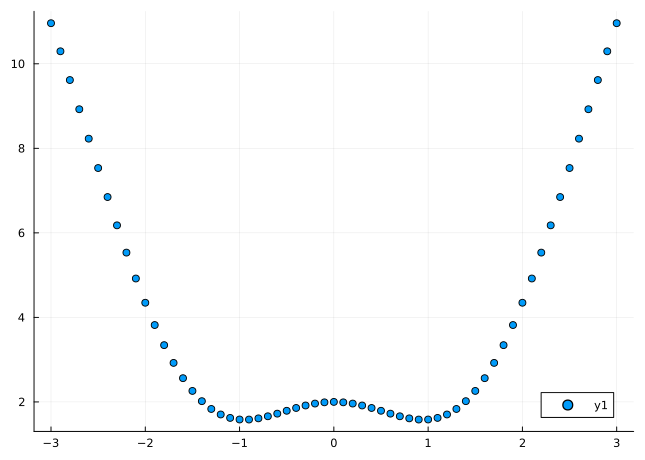

In [10]:
y = @. x^2 + 2cos(x)^2 

scatter(x, y)

In [11]:
model = SRRegressor(
    binary_operators = [+, -, *],    
    unary_operators = [cos],
    niterations=50
);

mach = machine(model, X, y)
fit!(mach)

[ Info: Training machine(SRRegressor(binary_operators = Function[+, -, *], …), …).
┌ Warning: You are using multithreading mode, but only one thread is available. Try starting julia with `--threads=auto`.
└ @ SymbolicRegression ~/.julia/packages/SymbolicRegression/5HYEt/src/SymbolicRegression.jl:546


Started!


0.0%┣                                             ┫ 0/750 [00:00<00:-10, -0s/it]Expressions evaluated per second: [.....]. Head worker occupation: 0.0%         Press 'q' and then <enter> to stop execution early.                             Hall of Fame:                                                                   ---------------------------------------------------------------------------------------------------                                                             Complexity  Loss       Score     Equation                                       1           1.872e+01  3.604e+01  y = 0.92076                                   2           1.848e+01  1.302e-02  y = cos(0.28572)                              3           1.425e+00  2.562e+00  y = (x₁ * x₁)                                 5           4.843e-01  5.397e-01  y = ((x₁ * x₁) + 0.97009)                     8           4.820e-01  1.596e-03  y = (((x₁ * x₁) + cos(0.28572)) * 1.0263)     10          4.361e-01  5.008e-02  y = ((

1.7%┣▉                                            ┫ 13/750 [00:00<00:08, 92it/s]Expressions evaluated per second: [.....]. Head worker occupation: 3.2%         Press 'q' and then <enter> to stop execution early.                             Hall of Fame:                                                                   ---------------------------------------------------------------------------------------------------                                                             Complexity  Loss       Score     Equation                                       1           1.171e+01  3.604e+01  y = 2.367                                     3           1.425e+00  1.053e+00  y = (x₁ * x₁)                                 5           4.843e-01  5.397e-01  y = ((x₁ * x₁) - -0.97009)                    8           4.114e-01  5.443e-02  y = ((x₁ * x₁) + cos(cos(cos(x₁))))           9           3.448e-01  1.765e-01  y = ((x₁ * x₁) + cos(cos(-1.4032 + x₁)))      10          3.191e-01  7.746e-02  y = ((

3.6%┣█▋                                          ┫ 27/750 [00:00<00:07, 105it/s]Expressions evaluated per second: [.....]. Head worker occupation: 3.7%         Press 'q' and then <enter> to stop execution early.                             Hall of Fame:                                                                   ---------------------------------------------------------------------------------------------------                                                             Complexity  Loss       Score     Equation                                       1           8.807e+00  3.604e+01  y = 4.0701                                    3           1.425e+00  9.105e-01  y = (x₁ * x₁)                                 5           4.843e-01  5.397e-01  y = ((x₁ * x₁) - -0.97009)                    7           4.710e-01  1.397e-02  y = (((x₁ * x₁) * 1.0417) + 0.84087)          8           4.114e-01  1.353e-01  y = ((x₁ * x₁) + cos(cos(cos(x₁))))           9           3.339e-01  2.087e-01  y = ((

4.4%┣██                                          ┫ 33/750 [00:00<00:07, 103it/s]Expressions evaluated per second: [.....]. Head worker occupation: 3.6%         Press 'q' and then <enter> to stop execution early.                             Hall of Fame:                                                                   ---------------------------------------------------------------------------------------------------                                                             Complexity  Loss       Score     Equation                                       1           8.807e+00  3.604e+01  y = 4.0701                                    3           1.425e+00  9.105e-01  y = (x₁ * x₁)                                 5           4.843e-01  5.397e-01  y = ((x₁ * x₁) - -0.97009)                    7           4.710e-01  1.397e-02  y = (((x₁ * x₁) * 1.0417) + 0.84087)          8           4.114e-01  1.353e-01  y = ((x₁ * x₁) + cos(cos(cos(x₁))))           9           3.339e-01  2.087e-01  y = ((

6.5%┣██▉                                         ┫ 49/750 [00:00<00:06, 111it/s]Expressions evaluated per second: [.....]. Head worker occupation: 3.8%         Press 'q' and then <enter> to stop execution early.                             Hall of Fame:                                                                   ---------------------------------------------------------------------------------------------------                                                             Complexity  Loss       Score     Equation                                       1           8.807e+00  3.604e+01  y = 4.0701                                    3           1.425e+00  9.105e-01  y = (x₁ * x₁)                                 5           4.843e-01  5.397e-01  y = ((x₁ * x₁) - -0.97009)                    7           4.710e-01  1.397e-02  y = (((x₁ * x₁) * 1.0417) + 0.84087)          8           4.114e-01  1.353e-01  y = ((x₁ * x₁) + cos(cos(cos(x₁))))           9           3.339e-01  2.087e-01  y = ((

8.9%┣████                                        ┫ 67/750 [00:01<00:06, 119it/s]Expressions evaluated per second: [.....]. Head worker occupation: 3.9%         Press 'q' and then <enter> to stop execution early.                             Hall of Fame:                                                                   ---------------------------------------------------------------------------------------------------                                                             Complexity  Loss       Score     Equation                                       1           8.807e+00  3.604e+01  y = 4.0701                                    3           1.425e+00  9.105e-01  y = (x₁ * x₁)                                 5           4.843e-01  5.397e-01  y = ((x₁ * x₁) - -0.97009)                    7           4.710e-01  1.397e-02  y = (((x₁ * x₁) * 1.0417) + 0.84087)          8           4.114e-01  1.353e-01  y = ((x₁ * x₁) + cos(cos(cos(x₁))))           9           3.339e-01  2.087e-01  y = ((

10.1%┣████▍                                      ┫ 76/750 [00:01<00:06, 121it/s]Expressions evaluated per second: [.....]. Head worker occupation: 4.0%         Press 'q' and then <enter> to stop execution early.                             Hall of Fame:                                                                   ---------------------------------------------------------------------------------------------------                                                             Complexity  Loss       Score     Equation                                       1           8.807e+00  3.604e+01  y = 4.0701                                    3           1.425e+00  9.105e-01  y = (x₁ * x₁)                                 5           4.843e-01  5.397e-01  y = ((x₁ * x₁) + 0.97009)                     7           4.710e-01  1.397e-02  y = (((x₁ * x₁) * 1.0417) + 0.84087)          8           4.114e-01  1.353e-01  y = ((x₁ * x₁) + cos(cos(cos(x₁))))           9           3.339e-01  2.087e-01  y = ((

12.5%┣█████▍                                     ┫ 94/750 [00:01<00:05, 126it/s]Expressions evaluated per second: [.....]. Head worker occupation: 4.0%         Press 'q' and then <enter> to stop execution early.                             Hall of Fame:                                                                   ---------------------------------------------------------------------------------------------------                                                             Complexity  Loss       Score     Equation                                       1           8.807e+00  3.604e+01  y = 4.0701                                    3           1.425e+00  9.105e-01  y = (x₁ * x₁)                                 5           4.843e-01  5.397e-01  y = ((x₁ * x₁) + 0.97009)                     7           4.710e-01  1.397e-02  y = (((x₁ * x₁) * 1.0417) + 0.84087)          8           4.114e-01  1.353e-01  y = ((x₁ * x₁) + cos(cos(cos(x₁))))           9           3.339e-01  2.087e-01  y = ((

14.8%┣██████▏                                   ┫ 111/750 [00:01<00:05, 128it/s]Expressions evaluated per second: [.....]. Head worker occupation: 4.0%         Press 'q' and then <enter> to stop execution early.                             Hall of Fame:                                                                   ---------------------------------------------------------------------------------------------------                                                             Complexity  Loss       Score     Equation                                       1           8.807e+00  3.604e+01  y = 4.0701                                    3           1.425e+00  9.105e-01  y = (x₁ * x₁)                                 5           4.843e-01  5.397e-01  y = ((x₁ * x₁) + 0.97009)                     7           4.710e-01  1.397e-02  y = (((x₁ * x₁) * 1.0417) + 0.84087)          8           4.114e-01  1.353e-01  y = ((x₁ * x₁) + cos(cos(cos(x₁))))           9           3.156e-01  2.648e-01  y = ((

16.8%┣███████                                   ┫ 126/750 [00:01<00:05, 128it/s]Expressions evaluated per second: [.....]. Head worker occupation: 4.0%         Press 'q' and then <enter> to stop execution early.                             Hall of Fame:                                                                   ---------------------------------------------------------------------------------------------------                                                             Complexity  Loss       Score     Equation                                       1           8.807e+00  3.604e+01  y = 4.0701                                    3           1.425e+00  9.105e-01  y = (x₁ * x₁)                                 5           4.843e-01  5.397e-01  y = ((x₁ * x₁) + 0.97009)                     7           4.710e-01  1.397e-02  y = (((x₁ * x₁) * 1.0417) + 0.84087)          8           4.114e-01  1.353e-01  y = ((x₁ * x₁) + cos(cos(cos(x₁))))           9           2.871e-01  3.597e-01  y = ((

17.9%┣███████▌                                  ┫ 134/750 [00:01<00:05, 128it/s]Expressions evaluated per second: 2.13e+05. Head worker occupation: 4.0%        Press 'q' and then <enter> to stop execution early.                             Hall of Fame:                                                                   ---------------------------------------------------------------------------------------------------                                                             Complexity  Loss       Score     Equation                                       1           8.807e+00  3.604e+01  y = 4.0701                                    3           1.425e+00  9.105e-01  y = (x₁ * x₁)                                 5           4.843e-01  5.397e-01  y = ((x₁ * x₁) + 0.97009)                     7           4.710e-01  1.397e-02  y = (((x₁ * x₁) * 1.0417) + 0.84087)          8           4.114e-01  1.353e-01  y = ((x₁ * x₁) + cos(cos(cos(x₁))))           9           2.871e-01  3.597e-01  y = ((

20.0%┣████████▍                                 ┫ 150/750 [00:01<00:05, 128it/s]Expressions evaluated per second: 2.13e+05. Head worker occupation: 4.0%        Press 'q' and then <enter> to stop execution early.                             Hall of Fame:                                                                   ---------------------------------------------------------------------------------------------------                                                             Complexity  Loss       Score     Equation                                       1           8.807e+00  3.604e+01  y = 4.0701                                    3           1.425e+00  9.105e-01  y = (x₁ * x₁)                                 5           4.843e-01  5.397e-01  y = ((x₁ * x₁) + 0.97009)                     7           4.710e-01  1.397e-02  y = (((x₁ * x₁) * 1.0417) + 0.84087)          8           4.114e-01  1.353e-01  y = ((x₁ * x₁) + cos(cos(cos(x₁))))           9           2.871e-01  3.597e-01  y = ((

22.1%┣█████████▎                                ┫ 166/750 [00:01<00:05, 128it/s]Expressions evaluated per second: 2.13e+05. Head worker occupation: 4.0%        Press 'q' and then <enter> to stop execution early.                             Hall of Fame:                                                                   ---------------------------------------------------------------------------------------------------                                                             Complexity  Loss       Score     Equation                                       1           8.807e+00  3.604e+01  y = 4.0701                                    3           1.425e+00  9.105e-01  y = (x₁ * x₁)                                 5           4.843e-01  5.397e-01  y = ((x₁ * x₁) + 0.97009)                     7           4.710e-01  1.397e-02  y = (((x₁ * x₁) * 1.0417) + 0.84087)          8           4.114e-01  1.353e-01  y = ((x₁ * x₁) + cos(cos(cos(x₁))))           9           2.871e-01  3.597e-01  y = ((

22.7%┣█████████▌                                ┫ 170/750 [00:01<00:05, 123it/s]Expressions evaluated per second: 2.13e+05. Head worker occupation: 3.9%        Press 'q' and then <enter> to stop execution early.                             Hall of Fame:                                                                   ---------------------------------------------------------------------------------------------------                                                             Complexity  Loss       Score     Equation                                       1           8.807e+00  3.604e+01  y = 4.0701                                    3           1.425e+00  9.105e-01  y = (x₁ * x₁)                                 5           4.843e-01  5.397e-01  y = ((x₁ * x₁) + 0.97009)                     7           4.710e-01  1.397e-02  y = (((x₁ * x₁) * 1.0417) + 0.84087)          8           4.114e-01  1.353e-01  y = ((x₁ * x₁) + cos(cos(cos(x₁))))           9           2.871e-01  3.597e-01  y = ((

23.6%┣██████████                                ┫ 177/750 [00:02<00:06, 104it/s]Expressions evaluated per second: 2.13e+05. Head worker occupation: 3.3%        Press 'q' and then <enter> to stop execution early.                             Hall of Fame:                                                                   ---------------------------------------------------------------------------------------------------                                                             Complexity  Loss       Score     Equation                                       1           8.807e+00  3.604e+01  y = 4.0701                                    3           1.425e+00  9.105e-01  y = (x₁ * x₁)                                 5           4.843e-01  5.397e-01  y = ((x₁ * x₁) + 0.97009)                     7           4.710e-01  1.397e-02  y = (((x₁ * x₁) * 1.0417) + 0.84087)          8           4.114e-01  1.353e-01  y = ((x₁ * x₁) + cos(cos(cos(x₁))))           9           2.871e-01  3.597e-01  y = ((

24.5%┣██████████▌                                ┫ 184/750 [00:02<00:06, 93it/s]Expressions evaluated per second: 2.13e+05. Head worker occupation: 3.0%        Press 'q' and then <enter> to stop execution early.                             Hall of Fame:                                                                   ---------------------------------------------------------------------------------------------------                                                             Complexity  Loss       Score     Equation                                       1           8.807e+00  3.604e+01  y = 4.0701                                    3           1.425e+00  9.105e-01  y = (x₁ * x₁)                                 5           4.843e-01  5.397e-01  y = ((x₁ * x₁) + 0.97009)                     7           4.710e-01  1.397e-02  y = (((x₁ * x₁) * 1.0417) + 0.84087)          8           4.114e-01  1.353e-01  y = ((x₁ * x₁) + cos(cos(cos(x₁))))           9           2.871e-01  3.597e-01  y = ((

26.7%┣███████████▌                               ┫ 200/750 [00:02<00:06, 96it/s]Expressions evaluated per second: 1.56e+05. Head worker occupation: 3.0%        Press 'q' and then <enter> to stop execution early.                             Hall of Fame:                                                                   ---------------------------------------------------------------------------------------------------                                                             Complexity  Loss       Score     Equation                                       1           8.807e+00  3.604e+01  y = 4.0701                                    3           1.425e+00  9.105e-01  y = (x₁ * x₁)                                 5           4.843e-01  5.397e-01  y = ((x₁ * x₁) + 0.97009)                     7           4.710e-01  1.397e-02  y = (((x₁ * x₁) * 1.0417) + 0.84087)          8           4.114e-01  1.353e-01  y = ((x₁ * x₁) + cos(cos(cos(x₁))))           9           2.871e-01  3.597e-01  y = ((

29.1%┣████████████▌                              ┫ 218/750 [00:02<00:05, 99it/s]Expressions evaluated per second: 1.56e+05. Head worker occupation: 3.1%        Press 'q' and then <enter> to stop execution early.                             Hall of Fame:                                                                   ---------------------------------------------------------------------------------------------------                                                             Complexity  Loss       Score     Equation                                       1           8.807e+00  3.604e+01  y = 4.0701                                    3           1.425e+00  9.105e-01  y = (x₁ * x₁)                                 5           4.843e-01  5.397e-01  y = ((x₁ * x₁) + 0.97009)                     7           4.710e-01  1.397e-02  y = (((x₁ * x₁) * 1.0417) + 0.84087)          8           4.114e-01  1.353e-01  y = ((x₁ * x₁) + cos(cos(cos(x₁))))           9           2.871e-01  3.597e-01  y = ((

31.3%┣█████████████▏                            ┫ 235/750 [00:02<00:05, 101it/s]Expressions evaluated per second: 1.56e+05. Head worker occupation: 3.2%        Press 'q' and then <enter> to stop execution early.                             Hall of Fame:                                                                   ---------------------------------------------------------------------------------------------------                                                             Complexity  Loss       Score     Equation                                       1           8.807e+00  3.604e+01  y = 4.0701                                    3           1.425e+00  9.105e-01  y = (x₁ * x₁)                                 5           4.843e-01  5.397e-01  y = ((x₁ * x₁) + 0.97009)                     7           4.710e-01  1.397e-02  y = (((x₁ * x₁) * 1.0417) + 0.84087)          8           4.114e-01  1.353e-01  y = ((x₁ * x₁) + cos(cos(cos(x₁))))           9           2.871e-01  3.597e-01  y = ((

32.4%┣█████████████▋                            ┫ 243/750 [00:02<00:05, 102it/s]Expressions evaluated per second: 1.56e+05. Head worker occupation: 3.2%        Press 'q' and then <enter> to stop execution early.                             Hall of Fame:                                                                   ---------------------------------------------------------------------------------------------------                                                             Complexity  Loss       Score     Equation                                       1           8.807e+00  3.604e+01  y = 4.0701                                    3           1.425e+00  9.105e-01  y = (x₁ * x₁)                                 5           4.843e-01  5.397e-01  y = ((x₁ * x₁) + 0.97009)                     7           4.710e-01  1.397e-02  y = (((x₁ * x₁) * 1.0417) + 0.84087)          8           4.114e-01  1.353e-01  y = ((x₁ * x₁) + cos(cos(cos(x₁))))           9           2.871e-01  3.597e-01  y = ((

34.4%┣██████████████▌                           ┫ 258/750 [00:03<00:05, 103it/s]Expressions evaluated per second: 1.56e+05. Head worker occupation: 3.2%        Press 'q' and then <enter> to stop execution early.                             Hall of Fame:                                                                   ---------------------------------------------------------------------------------------------------                                                             Complexity  Loss       Score     Equation                                       1           8.807e+00  3.604e+01  y = 4.0701                                    3           1.425e+00  9.105e-01  y = (x₁ * x₁)                                 5           4.843e-01  5.397e-01  y = ((x₁ * x₁) + 0.97009)                     7           4.710e-01  1.397e-02  y = (((x₁ * x₁) * 1.0417) + 0.84087)          8           4.114e-01  1.353e-01  y = ((x₁ * x₁) + cos(cos(cos(x₁))))           9           2.871e-01  3.597e-01  y = ((

36.5%┣███████████████▍                          ┫ 274/750 [00:03<00:05, 104it/s]Expressions evaluated per second: 1.56e+05. Head worker occupation: 3.3%        Press 'q' and then <enter> to stop execution early.                             Hall of Fame:                                                                   ---------------------------------------------------------------------------------------------------                                                             Complexity  Loss       Score     Equation                                       1           8.807e+00  3.604e+01  y = 4.0701                                    3           1.425e+00  9.105e-01  y = (x₁ * x₁)                                 5           4.843e-01  5.397e-01  y = ((x₁ * x₁) + 0.97009)                     7           4.710e-01  1.397e-02  y = (((x₁ * x₁) * 1.0417) + 0.84087)          8           4.114e-01  1.353e-01  y = ((x₁ * x₁) + cos(cos(cos(x₁))))           9           2.871e-01  3.597e-01  y = ((

37.5%┣███████████████▊                          ┫ 281/750 [00:03<00:04, 104it/s]Expressions evaluated per second: 1.56e+05. Head worker occupation: 3.3%        Press 'q' and then <enter> to stop execution early.                             Hall of Fame:                                                                   ---------------------------------------------------------------------------------------------------                                                             Complexity  Loss       Score     Equation                                       1           8.807e+00  3.604e+01  y = 4.0701                                    3           1.425e+00  9.105e-01  y = (x₁ * x₁)                                 5           4.843e-01  5.397e-01  y = ((x₁ * x₁) + 0.97009)                     7           4.710e-01  1.397e-02  y = (((x₁ * x₁) * 1.0417) + 0.84087)          8           4.114e-01  1.353e-01  y = ((x₁ * x₁) + cos(cos(cos(x₁))))           9           2.871e-01  3.597e-01  y = ((

39.7%┣████████████████▊                         ┫ 298/750 [00:03<00:04, 106it/s]Expressions evaluated per second: 1.56e+05. Head worker occupation: 3.4%        Press 'q' and then <enter> to stop execution early.                             Hall of Fame:                                                                   ---------------------------------------------------------------------------------------------------                                                             Complexity  Loss       Score     Equation                                       1           8.807e+00  3.604e+01  y = 4.0701                                    3           1.425e+00  9.105e-01  y = (x₁ * x₁)                                 5           4.843e-01  5.397e-01  y = ((x₁ * x₁) + 0.97009)                     7           4.710e-01  1.397e-02  y = (((x₁ * x₁) * 1.0417) + 0.84087)          8           4.114e-01  1.353e-01  y = ((x₁ * x₁) + cos(cos(cos(x₁))))           9           2.871e-01  3.597e-01  y = ((

41.9%┣█████████████████▋                        ┫ 314/750 [00:03<00:04, 107it/s]Expressions evaluated per second: 1.56e+05. Head worker occupation: 3.4%        Press 'q' and then <enter> to stop execution early.                             Hall of Fame:                                                                   ---------------------------------------------------------------------------------------------------                                                             Complexity  Loss       Score     Equation                                       1           8.807e+00  3.604e+01  y = 4.0701                                    3           1.425e+00  9.105e-01  y = (x₁ * x₁)                                 5           4.843e-01  5.397e-01  y = ((x₁ * x₁) + 0.97009)                     7           4.710e-01  1.397e-02  y = (((x₁ * x₁) * 1.0417) + 0.84087)          8           4.114e-01  1.353e-01  y = ((x₁ * x₁) + cos(cos(cos(x₁))))           9           2.871e-01  3.597e-01  y = ((

42.9%┣██████████████████                        ┫ 322/750 [00:03<00:04, 107it/s]Expressions evaluated per second: 1.56e+05. Head worker occupation: 3.4%        Press 'q' and then <enter> to stop execution early.                             Hall of Fame:                                                                   ---------------------------------------------------------------------------------------------------                                                             Complexity  Loss       Score     Equation                                       1           8.807e+00  3.604e+01  y = 4.0701                                    3           1.425e+00  9.105e-01  y = (x₁ * x₁)                                 5           4.843e-01  5.397e-01  y = ((x₁ * x₁) + 0.97009)                     7           4.710e-01  1.397e-02  y = (((x₁ * x₁) * 1.0417) + 0.84087)          8           2.558e-01  6.103e-01  y = (((x₁ * x₁) + cos(x₁)) * 1.3284)          10          1.423e-31  1.802e+01  y = ((

44.9%┣██████████████████▉                       ┫ 337/750 [00:03<00:04, 107it/s]Expressions evaluated per second: 1.78e+05. Head worker occupation: 3.4%        Press 'q' and then <enter> to stop execution early.                             Hall of Fame:                                                                   ---------------------------------------------------------------------------------------------------                                                             Complexity  Loss       Score     Equation                                       1           8.807e+00  3.604e+01  y = 4.0701                                    3           1.425e+00  9.105e-01  y = (x₁ * x₁)                                 5           4.843e-01  5.397e-01  y = ((x₁ * x₁) + 0.97009)                     7           4.710e-01  1.397e-02  y = (((x₁ * x₁) * 1.0417) + 0.84087)          8           2.558e-01  6.103e-01  y = (((x₁ * x₁) + cos(x₁)) * 1.3284)          10          1.423e-31  1.802e+01  y = ((

47.2%┣███████████████████▉                      ┫ 354/750 [00:03<00:04, 109it/s]Expressions evaluated per second: 1.78e+05. Head worker occupation: 3.5%        Press 'q' and then <enter> to stop execution early.                             Hall of Fame:                                                                   ---------------------------------------------------------------------------------------------------                                                             Complexity  Loss       Score     Equation                                       1           8.807e+00  3.604e+01  y = 4.0701                                    3           1.425e+00  9.105e-01  y = (x₁ * x₁)                                 5           4.843e-01  5.397e-01  y = ((x₁ * x₁) + 0.97009)                     7           4.710e-01  1.397e-02  y = (((x₁ * x₁) * 1.0417) + 0.84087)          8           2.558e-01  6.103e-01  y = (((x₁ * x₁) + cos(x₁)) * 1.3284)          10          1.423e-31  1.802e+01  y = ((

48.3%┣████████████████████▎                     ┫ 362/750 [00:03<00:04, 109it/s]Expressions evaluated per second: 1.78e+05. Head worker occupation: 3.5%        Press 'q' and then <enter> to stop execution early.                             Hall of Fame:                                                                   ---------------------------------------------------------------------------------------------------                                                             Complexity  Loss       Score     Equation                                       1           8.807e+00  3.604e+01  y = 4.0701                                    3           1.425e+00  9.105e-01  y = (x₁ * x₁)                                 5           4.843e-01  5.397e-01  y = ((x₁ * x₁) + 0.97009)                     7           4.710e-01  1.397e-02  y = (((x₁ * x₁) * 1.0417) + 0.84087)          8           2.558e-01  6.103e-01  y = (((x₁ * x₁) + cos(x₁)) * 1.3284)          10          1.423e-31  1.802e+01  y = ((

50.5%┣█████████████████████▎                    ┫ 379/750 [00:03<00:03, 110it/s]Expressions evaluated per second: 1.78e+05. Head worker occupation: 3.5%        Press 'q' and then <enter> to stop execution early.                             Hall of Fame:                                                                   ---------------------------------------------------------------------------------------------------                                                             Complexity  Loss       Score     Equation                                       1           8.807e+00  3.604e+01  y = 4.0701                                    3           1.425e+00  9.105e-01  y = (x₁ * x₁)                                 5           4.843e-01  5.397e-01  y = ((x₁ * x₁) + 0.97009)                     7           4.710e-01  1.397e-02  y = (((x₁ * x₁) * 1.0417) + 0.84087)          8           2.558e-01  6.103e-01  y = (((x₁ * x₁) + cos(x₁)) * 1.3284)          10          1.423e-31  1.802e+01  y = ((

51.7%┣█████████████████████▊                    ┫ 388/750 [00:04<00:03, 110it/s]Expressions evaluated per second: 1.78e+05. Head worker occupation: 3.5%        Press 'q' and then <enter> to stop execution early.                             Hall of Fame:                                                                   ---------------------------------------------------------------------------------------------------                                                             Complexity  Loss       Score     Equation                                       1           8.807e+00  3.604e+01  y = 4.0701                                    3           1.425e+00  9.105e-01  y = (x₁ * x₁)                                 5           4.843e-01  5.397e-01  y = ((x₁ * x₁) + 0.97009)                     7           4.710e-01  1.397e-02  y = (((x₁ * x₁) * 1.0417) + 0.84087)          8           2.558e-01  6.103e-01  y = (((x₁ * x₁) + cos(x₁)) * 1.3284)          10          1.423e-31  1.802e+01  y = ((

53.7%┣██████████████████████▋                   ┫ 403/750 [00:04<00:03, 111it/s]Expressions evaluated per second: 1.78e+05. Head worker occupation: 3.5%        Press 'q' and then <enter> to stop execution early.                             Hall of Fame:                                                                   ---------------------------------------------------------------------------------------------------                                                             Complexity  Loss       Score     Equation                                       1           8.807e+00  3.604e+01  y = 4.0701                                    3           1.425e+00  9.105e-01  y = (x₁ * x₁)                                 5           4.843e-01  5.397e-01  y = ((x₁ * x₁) + 0.97009)                     7           4.710e-01  1.397e-02  y = (((x₁ * x₁) * 1.0417) + 0.84087)          8           2.558e-01  6.103e-01  y = (((x₁ * x₁) + cos(x₁)) * 1.3284)          10          1.423e-31  1.802e+01  y = ((

55.7%┣███████████████████████▍                  ┫ 418/750 [00:04<00:03, 111it/s]Expressions evaluated per second: 1.78e+05. Head worker occupation: 3.6%        Press 'q' and then <enter> to stop execution early.                             Hall of Fame:                                                                   ---------------------------------------------------------------------------------------------------                                                             Complexity  Loss       Score     Equation                                       1           8.807e+00  3.604e+01  y = 4.0701                                    3           1.425e+00  9.105e-01  y = (x₁ * x₁)                                 5           4.843e-01  5.397e-01  y = ((x₁ * x₁) + 0.97009)                     7           4.710e-01  1.397e-02  y = (((x₁ * x₁) * 1.0417) + 0.84087)          8           2.558e-01  6.103e-01  y = (((x₁ * x₁) + cos(x₁)) * 1.3284)          10          1.423e-31  1.802e+01  y = ((

57.9%┣████████████████████████▎                 ┫ 434/750 [00:04<00:03, 112it/s]Expressions evaluated per second: 1.78e+05. Head worker occupation: 3.7%        Press 'q' and then <enter> to stop execution early.                             Hall of Fame:                                                                   ---------------------------------------------------------------------------------------------------                                                             Complexity  Loss       Score     Equation                                       1           8.807e+00  3.604e+01  y = 4.0701                                    3           1.425e+00  9.105e-01  y = (x₁ * x₁)                                 5           4.843e-01  5.397e-01  y = ((x₁ * x₁) + 0.97009)                     7           4.710e-01  1.397e-02  y = (((x₁ * x₁) * 1.0417) + 0.84087)          8           2.558e-01  6.103e-01  y = (((x₁ * x₁) + cos(x₁)) * 1.3284)          10          1.423e-31  1.802e+01  y = ((

58.8%┣████████████████████████▊                 ┫ 441/750 [00:04<00:03, 112it/s]Expressions evaluated per second: 1.78e+05. Head worker occupation: 3.7%        Press 'q' and then <enter> to stop execution early.                             Hall of Fame:                                                                   ---------------------------------------------------------------------------------------------------                                                             Complexity  Loss       Score     Equation                                       1           8.807e+00  3.604e+01  y = 4.0701                                    3           1.425e+00  9.105e-01  y = (x₁ * x₁)                                 5           4.843e-01  5.397e-01  y = ((x₁ * x₁) + 0.97009)                     7           4.710e-01  1.397e-02  y = (((x₁ * x₁) * 1.0417) + 0.84087)          8           2.558e-01  6.103e-01  y = (((x₁ * x₁) + cos(x₁)) * 1.3284)          10          1.423e-31  1.802e+01  y = ((

60.8%┣█████████████████████████▌                ┫ 456/750 [00:04<00:03, 112it/s]Expressions evaluated per second: 1.86e+05. Head worker occupation: 3.7%        Press 'q' and then <enter> to stop execution early.                             Hall of Fame:                                                                   ---------------------------------------------------------------------------------------------------                                                             Complexity  Loss       Score     Equation                                       1           8.807e+00  3.604e+01  y = 4.0701                                    3           1.425e+00  9.105e-01  y = (x₁ * x₁)                                 5           4.843e-01  5.397e-01  y = ((x₁ * x₁) + 0.97009)                     7           4.710e-01  1.397e-02  y = (((x₁ * x₁) * 1.0417) + 0.84087)          8           2.558e-01  6.103e-01  y = (((x₁ * x₁) + cos(x₁)) * 1.3284)          10          1.423e-31  1.802e+01  y = ((

62.9%┣██████████████████████████▍               ┫ 472/750 [00:04<00:02, 113it/s]Expressions evaluated per second: 1.86e+05. Head worker occupation: 3.7%        Press 'q' and then <enter> to stop execution early.                             Hall of Fame:                                                                   ---------------------------------------------------------------------------------------------------                                                             Complexity  Loss       Score     Equation                                       1           8.807e+00  3.604e+01  y = 4.0701                                    3           1.425e+00  9.105e-01  y = (x₁ * x₁)                                 5           4.843e-01  5.397e-01  y = ((x₁ * x₁) + 0.97009)                     7           4.710e-01  1.397e-02  y = (((x₁ * x₁) * 1.0417) + 0.84087)          8           2.558e-01  6.103e-01  y = (((x₁ * x₁) + cos(x₁)) * 1.3284)          10          1.423e-31  1.802e+01  y = ((

64.0%┣██████████████████████████▉               ┫ 480/750 [00:04<00:02, 113it/s]Expressions evaluated per second: 1.86e+05. Head worker occupation: 3.7%        Press 'q' and then <enter> to stop execution early.                             Hall of Fame:                                                                   ---------------------------------------------------------------------------------------------------                                                             Complexity  Loss       Score     Equation                                       1           8.807e+00  3.604e+01  y = 4.0701                                    3           1.425e+00  9.105e-01  y = (x₁ * x₁)                                 5           4.843e-01  5.397e-01  y = ((x₁ * x₁) + 0.97009)                     7           4.710e-01  1.397e-02  y = (((x₁ * x₁) * 1.0417) + 0.84087)          8           2.558e-01  6.103e-01  y = (((x₁ * x₁) + cos(x₁)) * 1.3284)          10          1.423e-31  1.802e+01  y = ((

66.1%┣███████████████████████████▊              ┫ 496/750 [00:04<00:02, 114it/s]Expressions evaluated per second: 1.86e+05. Head worker occupation: 3.7%        Press 'q' and then <enter> to stop execution early.                             Hall of Fame:                                                                   ---------------------------------------------------------------------------------------------------                                                             Complexity  Loss       Score     Equation                                       1           8.807e+00  3.604e+01  y = 4.0701                                    3           1.425e+00  9.105e-01  y = (x₁ * x₁)                                 5           4.843e-01  5.397e-01  y = ((x₁ * x₁) + 0.97009)                     7           4.710e-01  1.397e-02  y = (((x₁ * x₁) * 1.0417) + 0.84087)          8           2.558e-01  6.103e-01  y = (((x₁ * x₁) + cos(x₁)) * 1.3284)          10          1.423e-31  1.802e+01  y = ((

68.0%┣████████████████████████████▋             ┫ 510/750 [00:04<00:02, 113it/s]Expressions evaluated per second: 1.86e+05. Head worker occupation: 3.7%        Press 'q' and then <enter> to stop execution early.                             Hall of Fame:                                                                   ---------------------------------------------------------------------------------------------------                                                             Complexity  Loss       Score     Equation                                       1           8.807e+00  3.604e+01  y = 4.0701                                    3           1.425e+00  9.105e-01  y = (x₁ * x₁)                                 5           4.843e-01  5.397e-01  y = ((x₁ * x₁) + 0.97009)                     7           4.710e-01  1.397e-02  y = (((x₁ * x₁) * 1.0417) + 0.84087)          8           2.558e-01  6.103e-01  y = (((x₁ * x₁) + cos(x₁)) * 1.3284)          10          1.423e-31  1.802e+01  y = ((

68.9%┣█████████████████████████████             ┫ 517/750 [00:05<00:02, 113it/s]Expressions evaluated per second: 1.86e+05. Head worker occupation: 3.7%        Press 'q' and then <enter> to stop execution early.                             Hall of Fame:                                                                   ---------------------------------------------------------------------------------------------------                                                             Complexity  Loss       Score     Equation                                       1           8.807e+00  3.604e+01  y = 4.0701                                    3           1.425e+00  9.105e-01  y = (x₁ * x₁)                                 5           4.843e-01  5.397e-01  y = ((x₁ * x₁) + 0.97009)                     7           4.710e-01  1.397e-02  y = (((x₁ * x₁) * 1.0417) + 0.84087)          8           2.558e-01  6.103e-01  y = (((x₁ * x₁) + cos(x₁)) * 1.3284)          10          1.423e-31  1.802e+01  y = ((

70.9%┣█████████████████████████████▉            ┫ 532/750 [00:05<00:02, 114it/s]Expressions evaluated per second: 1.86e+05. Head worker occupation: 3.7%        Press 'q' and then <enter> to stop execution early.                             Hall of Fame:                                                                   ---------------------------------------------------------------------------------------------------                                                             Complexity  Loss       Score     Equation                                       1           8.807e+00  3.604e+01  y = 4.0701                                    3           1.425e+00  9.105e-01  y = (x₁ * x₁)                                 5           4.843e-01  5.397e-01  y = ((x₁ * x₁) + 0.97009)                     7           4.710e-01  1.397e-02  y = (((x₁ * x₁) * 1.0417) + 0.84087)          8           2.558e-01  6.103e-01  y = (((x₁ * x₁) + cos(x₁)) * 1.3284)          10          1.423e-31  1.802e+01  y = ((

72.9%┣██████████████████████████████▋           ┫ 547/750 [00:05<00:02, 114it/s]Expressions evaluated per second: 1.86e+05. Head worker occupation: 3.7%        Press 'q' and then <enter> to stop execution early.                             Hall of Fame:                                                                   ---------------------------------------------------------------------------------------------------                                                             Complexity  Loss       Score     Equation                                       1           8.807e+00  3.604e+01  y = 4.0701                                    3           1.425e+00  9.105e-01  y = (x₁ * x₁)                                 5           4.843e-01  5.397e-01  y = ((x₁ * x₁) + 0.97009)                     7           4.710e-01  1.397e-02  y = (((x₁ * x₁) * 1.0417) + 0.84087)          8           2.558e-01  6.103e-01  y = (((x₁ * x₁) + cos(x₁)) * 1.3284)          10          1.423e-31  1.802e+01  y = ((

74.9%┣███████████████████████████████▌          ┫ 562/750 [00:05<00:02, 114it/s]Expressions evaluated per second: 1.86e+05. Head worker occupation: 3.7%        Press 'q' and then <enter> to stop execution early.                             Hall of Fame:                                                                   ---------------------------------------------------------------------------------------------------                                                             Complexity  Loss       Score     Equation                                       1           8.807e+00  3.604e+01  y = 4.0701                                    3           1.425e+00  9.105e-01  y = (x₁ * x₁)                                 5           4.843e-01  5.397e-01  y = ((x₁ * x₁) + 0.97009)                     7           4.710e-01  1.397e-02  y = (((x₁ * x₁) * 1.0417) + 0.84087)          8           2.558e-01  6.103e-01  y = (((x₁ * x₁) + cos(x₁)) * 1.3284)          10          1.423e-31  1.802e+01  y = ((

76.9%┣████████████████████████████████▎         ┫ 577/750 [00:05<00:02, 115it/s]Expressions evaluated per second: 1.90e+05. Head worker occupation: 3.7%        Press 'q' and then <enter> to stop execution early.                             Hall of Fame:                                                                   ---------------------------------------------------------------------------------------------------                                                             Complexity  Loss       Score     Equation                                       1           8.807e+00  3.604e+01  y = 4.0701                                    3           1.425e+00  9.105e-01  y = (x₁ * x₁)                                 5           4.843e-01  5.397e-01  y = ((x₁ * x₁) + 0.97009)                     7           4.710e-01  1.397e-02  y = (((x₁ * x₁) * 1.0417) + 0.84087)          8           2.558e-01  6.103e-01  y = (((x₁ * x₁) + cos(x₁)) * 1.3284)          10          1.423e-31  1.802e+01  y = ((

78.0%┣████████████████████████████████▊         ┫ 585/750 [00:05<00:01, 115it/s]Expressions evaluated per second: 1.90e+05. Head worker occupation: 3.7%        Press 'q' and then <enter> to stop execution early.                             Hall of Fame:                                                                   ---------------------------------------------------------------------------------------------------                                                             Complexity  Loss       Score     Equation                                       1           8.807e+00  3.604e+01  y = 4.0701                                    3           1.425e+00  9.105e-01  y = (x₁ * x₁)                                 5           4.843e-01  5.397e-01  y = ((x₁ * x₁) + 0.97009)                     7           4.710e-01  1.397e-02  y = (((x₁ * x₁) * 1.0417) + 0.84087)          8           2.558e-01  6.103e-01  y = (((x₁ * x₁) + cos(x₁)) * 1.3284)          10          1.423e-31  1.802e+01  y = ((

80.3%┣█████████████████████████████████▊        ┫ 602/750 [00:05<00:01, 116it/s]Expressions evaluated per second: 1.90e+05. Head worker occupation: 3.7%        Press 'q' and then <enter> to stop execution early.                             Hall of Fame:                                                                   ---------------------------------------------------------------------------------------------------                                                             Complexity  Loss       Score     Equation                                       1           8.807e+00  3.604e+01  y = 4.0701                                    3           1.425e+00  9.105e-01  y = (x₁ * x₁)                                 5           4.843e-01  5.397e-01  y = ((x₁ * x₁) + 0.97009)                     7           4.710e-01  1.397e-02  y = (((x₁ * x₁) * 1.0417) + 0.84087)          8           2.558e-01  6.103e-01  y = (((x₁ * x₁) + cos(x₁)) * 1.3284)          10          1.423e-31  1.802e+01  y = ((

82.3%┣██████████████████████████████████▌       ┫ 617/750 [00:05<00:01, 116it/s]Expressions evaluated per second: 1.90e+05. Head worker occupation: 3.7%        Press 'q' and then <enter> to stop execution early.                             Hall of Fame:                                                                   ---------------------------------------------------------------------------------------------------                                                             Complexity  Loss       Score     Equation                                       1           8.807e+00  3.604e+01  y = 4.0701                                    3           1.425e+00  9.105e-01  y = (x₁ * x₁)                                 5           4.843e-01  5.397e-01  y = ((x₁ * x₁) + 0.97009)                     7           4.710e-01  1.397e-02  y = (((x₁ * x₁) * 1.0417) + 0.84087)          8           2.558e-01  6.103e-01  y = (((x₁ * x₁) + cos(x₁)) * 1.3284)          10          1.423e-31  1.802e+01  y = ((

83.1%┣██████████████████████████████████▉       ┫ 623/750 [00:05<00:01, 115it/s]Expressions evaluated per second: 1.90e+05. Head worker occupation: 3.7%        Press 'q' and then <enter> to stop execution early.                             Hall of Fame:                                                                   ---------------------------------------------------------------------------------------------------                                                             Complexity  Loss       Score     Equation                                       1           8.807e+00  3.604e+01  y = 4.0701                                    3           1.425e+00  9.105e-01  y = (x₁ * x₁)                                 5           4.843e-01  5.397e-01  y = ((x₁ * x₁) + 0.97009)                     7           4.710e-01  1.397e-02  y = (((x₁ * x₁) * 1.0417) + 0.84087)          8           2.558e-01  6.103e-01  y = (((x₁ * x₁) + cos(x₁)) * 1.3284)          10          1.423e-31  1.802e+01  y = ((

84.9%┣███████████████████████████████████▊      ┫ 637/750 [00:06<00:01, 115it/s]Expressions evaluated per second: 1.90e+05. Head worker occupation: 3.7%        Press 'q' and then <enter> to stop execution early.                             Hall of Fame:                                                                   ---------------------------------------------------------------------------------------------------                                                             Complexity  Loss       Score     Equation                                       1           8.807e+00  3.604e+01  y = 4.0701                                    3           1.425e+00  9.105e-01  y = (x₁ * x₁)                                 5           4.843e-01  5.397e-01  y = ((x₁ * x₁) + 0.97009)                     7           4.710e-01  1.397e-02  y = (((x₁ * x₁) * 1.0417) + 0.84087)          8           2.558e-01  6.103e-01  y = (((x₁ * x₁) + cos(x₁)) * 1.3284)          10          1.423e-31  1.802e+01  y = ((

86.9%┣████████████████████████████████████▌     ┫ 652/750 [00:06<00:01, 116it/s]Expressions evaluated per second: 1.90e+05. Head worker occupation: 3.7%        Press 'q' and then <enter> to stop execution early.                             Hall of Fame:                                                                   ---------------------------------------------------------------------------------------------------                                                             Complexity  Loss       Score     Equation                                       1           8.807e+00  3.604e+01  y = 4.0701                                    3           1.425e+00  9.105e-01  y = (x₁ * x₁)                                 5           4.843e-01  5.397e-01  y = ((x₁ * x₁) + 0.97009)                     7           4.710e-01  1.397e-02  y = (((x₁ * x₁) * 1.0417) + 0.84087)          8           2.558e-01  6.103e-01  y = (((x₁ * x₁) + cos(x₁)) * 1.3284)          10          1.423e-31  1.802e+01  y = ((

88.9%┣█████████████████████████████████████▍    ┫ 667/750 [00:06<00:01, 116it/s]Expressions evaluated per second: 1.90e+05. Head worker occupation: 3.7%        Press 'q' and then <enter> to stop execution early.                             Hall of Fame:                                                                   ---------------------------------------------------------------------------------------------------                                                             Complexity  Loss       Score     Equation                                       1           8.807e+00  3.604e+01  y = 4.0701                                    3           1.425e+00  9.105e-01  y = (x₁ * x₁)                                 5           4.843e-01  5.397e-01  y = ((x₁ * x₁) + 0.97009)                     7           4.710e-01  1.397e-02  y = (((x₁ * x₁) * 1.0417) + 0.84087)          8           2.558e-01  6.103e-01  y = (((x₁ * x₁) + cos(x₁)) * 1.3284)          10          1.423e-31  1.802e+01  y = ((

89.9%┣█████████████████████████████████████▊    ┫ 674/750 [00:06<00:01, 116it/s]Expressions evaluated per second: 1.90e+05. Head worker occupation: 3.7%        Press 'q' and then <enter> to stop execution early.                             Hall of Fame:                                                                   ---------------------------------------------------------------------------------------------------                                                             Complexity  Loss       Score     Equation                                       1           8.807e+00  3.604e+01  y = 4.0701                                    3           1.425e+00  9.105e-01  y = (x₁ * x₁)                                 5           4.843e-01  5.397e-01  y = ((x₁ * x₁) + 0.97009)                     7           4.710e-01  1.397e-02  y = (((x₁ * x₁) * 1.0417) + 0.84087)          8           2.558e-01  6.103e-01  y = (((x₁ * x₁) + cos(x₁)) * 1.3284)          10          1.423e-31  1.802e+01  y = ((

91.6%┣██████████████████████████████████████▌   ┫ 687/750 [00:06<00:01, 116it/s]Expressions evaluated per second: 1.90e+05. Head worker occupation: 3.7%        Press 'q' and then <enter> to stop execution early.                             Hall of Fame:                                                                   ---------------------------------------------------------------------------------------------------                                                             Complexity  Loss       Score     Equation                                       1           8.807e+00  3.604e+01  y = 4.0701                                    3           1.425e+00  9.105e-01  y = (x₁ * x₁)                                 5           4.843e-01  5.397e-01  y = ((x₁ * x₁) + 0.97009)                     7           4.710e-01  1.397e-02  y = (((x₁ * x₁) * 1.0417) + 0.84087)          8           2.558e-01  6.103e-01  y = (((x₁ * x₁) + cos(x₁)) * 1.3284)          10          1.423e-31  1.802e+01  y = ((

93.7%┣███████████████████████████████████████▍  ┫ 703/750 [00:06<00:00, 116it/s]Expressions evaluated per second: 1.92e+05. Head worker occupation: 3.8%        Press 'q' and then <enter> to stop execution early.                             Hall of Fame:                                                                   ---------------------------------------------------------------------------------------------------                                                             Complexity  Loss       Score     Equation                                       1           8.807e+00  3.604e+01  y = 4.0701                                    3           1.425e+00  9.105e-01  y = (x₁ * x₁)                                 5           4.843e-01  5.397e-01  y = ((x₁ * x₁) + 0.97009)                     7           4.710e-01  1.397e-02  y = (((x₁ * x₁) * 1.0417) + 0.84087)          8           2.558e-01  6.103e-01  y = (((x₁ * x₁) + cos(x₁)) * 1.3284)          10          1.423e-31  1.802e+01  y = ((

94.8%┣███████████████████████████████████████▉  ┫ 711/750 [00:06<00:00, 116it/s]Expressions evaluated per second: 1.92e+05. Head worker occupation: 3.7%        Press 'q' and then <enter> to stop execution early.                             Hall of Fame:                                                                   ---------------------------------------------------------------------------------------------------                                                             Complexity  Loss       Score     Equation                                       1           8.807e+00  3.604e+01  y = 4.0701                                    3           1.425e+00  9.105e-01  y = (x₁ * x₁)                                 5           4.843e-01  5.397e-01  y = ((x₁ * x₁) + 0.97009)                     7           4.710e-01  1.397e-02  y = (((x₁ * x₁) * 1.0417) + 0.84087)          8           2.558e-01  6.103e-01  y = (((x₁ * x₁) + cos(x₁)) * 1.3284)          10          1.423e-31  1.802e+01  y = ((

96.7%┣████████████████████████████████████████▋ ┫ 725/750 [00:06<00:00, 116it/s]Expressions evaluated per second: 1.92e+05. Head worker occupation: 3.8%        Press 'q' and then <enter> to stop execution early.                             Hall of Fame:                                                                   ---------------------------------------------------------------------------------------------------                                                             Complexity  Loss       Score     Equation                                       1           8.807e+00  3.604e+01  y = 4.0701                                    3           1.425e+00  9.105e-01  y = (x₁ * x₁)                                 5           4.843e-01  5.397e-01  y = ((x₁ * x₁) + 0.97009)                     7           4.710e-01  1.397e-02  y = (((x₁ * x₁) * 1.0417) + 0.84087)          8           2.558e-01  6.103e-01  y = (((x₁ * x₁) + cos(x₁)) * 1.3284)          10          1.423e-31  1.802e+01  y = ((

98.8%┣█████████████████████████████████████████▌┫ 741/750 [00:06<00:00, 116it/s]Expressions evaluated per second: 1.92e+05. Head worker occupation: 3.8%        Press 'q' and then <enter> to stop execution early.                             Hall of Fame:                                                                   ---------------------------------------------------------------------------------------------------                                                             Complexity  Loss       Score     Equation                                       1           8.807e+00  3.604e+01  y = 4.0701                                    3           1.425e+00  9.105e-01  y = (x₁ * x₁)                                 5           4.843e-01  5.397e-01  y = ((x₁ * x₁) + 0.97009)                     7           4.710e-01  1.397e-02  y = (((x₁ * x₁) * 1.0417) + 0.84087)          8           2.558e-01  6.103e-01  y = (((x₁ * x₁) + cos(x₁)) * 1.3284)          10          1.423e-31  1.802e+01  y = ((

trained Machine; caches model-specific representations of data
  model: SRRegressor(binary_operators = Function[+, -, *], …)
  args: 
    1:	Source @752 ⏎ AbstractMatrix{Continuous}
    2:	Source @124 ⏎ AbstractVector{Continuous}


In [12]:
r = report(mach)
r.equations[r.best_idx]

(((x₁ * x₁) + 1.0) + cos(x₁ + x₁))

In [13]:
node_to_symbolic(r.equations[r.best_idx], model)

((x1 * x1) + 1.0) + cos(x1 + x1)